In [35]:
class SGD:
    def __init__(self, num_params, lr=1e-3, momentum = 0.0):
        self.lr = lr 
        self.momentum = momentum
        self.velocity = np.zeros(num_params)

    def step(self, w, grad_w):
        self.velocity = self.momentum * self.velocity - (1.0 - self.momentum) * grad_w
        
        w = w + self.lr * self.velocity
        return w

In [22]:
import numpy as np

class LinearSystem:
  # Initialize model class
  def __init__(self, A, b, x0):    
      self.A = A
      self.b = b
      self.x = x0
      self.N = A.shape[0]
      self.it_cnt = 0
      self.loss_log = []
      
  def compute_loss(self, A, b):
      diff = np.matmul(A, self.x) - b
      loss = np.mean(np.matmul(diff.T, diff), axis = 0)
      gradient = 2.0*np.matmul(diff.T, A)
      return loss, gradient
      
  def fetch_minibtach(self, M):
      idx = np.random.permutation(self.N)[:M]
      A = self.A[idx,:]
      b = self.b[idx]
      return A,b
      
  def solve(self, optimizer, batch_size = 128, tol = 1e-6):
      loss = 1.0
      while loss > tol:
          self.it_cnt = self.it_cnt + 1
          # Fetch minibatch
          A, b = self.fetch_minibtach(batch_size)
          # Evaluate loss using current parameters
          loss, gradient = self.compute_loss(A, b)
          if self.it_cnt % 10 == 0:
              self.loss_log.append(loss)
              print("Iteration: %d, loss: %.3e" % (self.it_cnt, loss))
          if np.isinf(loss):
              break
          # Update parameters
          self.x = optimizer.step(self.x.flatten(), gradient.flatten())[:,None]
      return self.x

Iteration: 10, loss: 3.579e+02
Iteration: 20, loss: 4.120e+02
Iteration: 30, loss: 3.186e+02
Iteration: 40, loss: 2.512e+02
Iteration: 50, loss: 2.085e+02
Iteration: 60, loss: 1.762e+02
Iteration: 70, loss: 2.806e+02
Iteration: 80, loss: 9.203e+01
Iteration: 90, loss: 3.847e+02
Iteration: 100, loss: 2.094e+02
Iteration: 110, loss: 1.976e+02
Iteration: 120, loss: 1.905e+02
Iteration: 130, loss: 2.755e+02
Iteration: 140, loss: 1.883e+02
Iteration: 150, loss: 2.726e+02
Iteration: 160, loss: 2.740e+02
Iteration: 170, loss: 2.432e+02
Iteration: 180, loss: 1.485e+02
Iteration: 190, loss: 1.206e+02
Iteration: 200, loss: 1.872e+02
Iteration: 210, loss: 2.312e+02
Iteration: 220, loss: 1.218e+02
Iteration: 230, loss: 1.110e+02
Iteration: 240, loss: 1.269e+02
Iteration: 250, loss: 1.214e+02
Iteration: 260, loss: 1.679e+02
Iteration: 270, loss: 1.769e+02
Iteration: 280, loss: 1.370e+02
Iteration: 290, loss: 1.033e+02
Iteration: 300, loss: 1.481e+02
Iteration: 310, loss: 1.456e+02
Iteration: 320, l

Iteration: 2680, loss: 6.013e+00
Iteration: 2690, loss: 3.296e+00
Iteration: 2700, loss: 3.549e+00
Iteration: 2710, loss: 4.832e+00
Iteration: 2720, loss: 5.354e+00
Iteration: 2730, loss: 4.456e+00
Iteration: 2740, loss: 6.734e+00
Iteration: 2750, loss: 4.745e+00
Iteration: 2760, loss: 4.485e+00
Iteration: 2770, loss: 5.571e+00
Iteration: 2780, loss: 5.741e+00
Iteration: 2790, loss: 4.515e+00
Iteration: 2800, loss: 7.242e+00
Iteration: 2810, loss: 5.569e+00
Iteration: 2820, loss: 4.681e+00
Iteration: 2830, loss: 4.427e+00
Iteration: 2840, loss: 5.071e+00
Iteration: 2850, loss: 3.686e+00
Iteration: 2860, loss: 5.079e+00
Iteration: 2870, loss: 5.728e+00
Iteration: 2880, loss: 4.992e+00
Iteration: 2890, loss: 3.935e+00
Iteration: 2900, loss: 4.264e+00
Iteration: 2910, loss: 3.317e+00
Iteration: 2920, loss: 4.648e+00
Iteration: 2930, loss: 3.727e+00
Iteration: 2940, loss: 4.140e+00
Iteration: 2950, loss: 4.220e+00
Iteration: 2960, loss: 2.705e+00
Iteration: 2970, loss: 2.563e+00
Iteration:

Iteration: 5390, loss: 1.605e+00
Iteration: 5400, loss: 7.767e-01
Iteration: 5410, loss: 1.020e+00
Iteration: 5420, loss: 1.474e+00
Iteration: 5430, loss: 1.770e+00
Iteration: 5440, loss: 1.004e+00
Iteration: 5450, loss: 9.849e-01
Iteration: 5460, loss: 8.842e-01
Iteration: 5470, loss: 9.311e-01
Iteration: 5480, loss: 1.126e+00
Iteration: 5490, loss: 9.504e-01
Iteration: 5500, loss: 1.209e+00
Iteration: 5510, loss: 7.717e-01
Iteration: 5520, loss: 1.044e+00
Iteration: 5530, loss: 1.263e+00
Iteration: 5540, loss: 1.170e+00
Iteration: 5550, loss: 1.572e+00
Iteration: 5560, loss: 1.447e+00
Iteration: 5570, loss: 9.771e-01
Iteration: 5580, loss: 9.828e-01
Iteration: 5590, loss: 1.176e+00
Iteration: 5600, loss: 1.115e+00
Iteration: 5610, loss: 9.988e-01
Iteration: 5620, loss: 7.661e-01
Iteration: 5630, loss: 8.185e-01
Iteration: 5640, loss: 1.006e+00
Iteration: 5650, loss: 1.188e+00
Iteration: 5660, loss: 9.844e-01
Iteration: 5670, loss: 8.000e-01
Iteration: 5680, loss: 1.169e+00
Iteration:

Iteration: 8160, loss: 3.866e-01
Iteration: 8170, loss: 3.103e-01
Iteration: 8180, loss: 3.149e-01
Iteration: 8190, loss: 3.688e-01
Iteration: 8200, loss: 3.523e-01
Iteration: 8210, loss: 5.505e-01
Iteration: 8220, loss: 4.443e-01
Iteration: 8230, loss: 3.559e-01
Iteration: 8240, loss: 3.285e-01
Iteration: 8250, loss: 3.064e-01
Iteration: 8260, loss: 2.892e-01
Iteration: 8270, loss: 4.296e-01
Iteration: 8280, loss: 2.446e-01
Iteration: 8290, loss: 3.551e-01
Iteration: 8300, loss: 2.681e-01
Iteration: 8310, loss: 4.469e-01
Iteration: 8320, loss: 2.413e-01
Iteration: 8330, loss: 2.877e-01
Iteration: 8340, loss: 2.034e-01
Iteration: 8350, loss: 3.555e-01
Iteration: 8360, loss: 3.574e-01
Iteration: 8370, loss: 4.264e-01
Iteration: 8380, loss: 3.820e-01
Iteration: 8390, loss: 3.646e-01
Iteration: 8400, loss: 4.016e-01
Iteration: 8410, loss: 4.859e-01
Iteration: 8420, loss: 2.783e-01
Iteration: 8430, loss: 2.365e-01
Iteration: 8440, loss: 4.310e-01
Iteration: 8450, loss: 2.965e-01
Iteration:

Iteration: 10790, loss: 2.244e-01
Iteration: 10800, loss: 1.934e-01
Iteration: 10810, loss: 1.188e-01
Iteration: 10820, loss: 1.020e-01
Iteration: 10830, loss: 1.624e-01
Iteration: 10840, loss: 1.733e-01
Iteration: 10850, loss: 1.622e-01
Iteration: 10860, loss: 1.666e-01
Iteration: 10870, loss: 1.623e-01
Iteration: 10880, loss: 1.116e-01
Iteration: 10890, loss: 9.079e-02
Iteration: 10900, loss: 1.152e-01
Iteration: 10910, loss: 1.424e-01
Iteration: 10920, loss: 1.053e-01
Iteration: 10930, loss: 2.196e-01
Iteration: 10940, loss: 1.385e-01
Iteration: 10950, loss: 1.550e-01
Iteration: 10960, loss: 1.435e-01
Iteration: 10970, loss: 1.285e-01
Iteration: 10980, loss: 2.072e-01
Iteration: 10990, loss: 2.106e-01
Iteration: 11000, loss: 1.596e-01
Iteration: 11010, loss: 1.054e-01
Iteration: 11020, loss: 1.274e-01
Iteration: 11030, loss: 9.914e-02
Iteration: 11040, loss: 1.637e-01
Iteration: 11050, loss: 1.401e-01
Iteration: 11060, loss: 1.182e-01
Iteration: 11070, loss: 1.606e-01
Iteration: 110

Iteration: 13390, loss: 6.401e-02
Iteration: 13400, loss: 6.132e-02
Iteration: 13410, loss: 8.627e-02
Iteration: 13420, loss: 5.641e-02
Iteration: 13430, loss: 6.116e-02
Iteration: 13440, loss: 1.048e-01
Iteration: 13450, loss: 6.284e-02
Iteration: 13460, loss: 4.286e-02
Iteration: 13470, loss: 5.822e-02
Iteration: 13480, loss: 3.592e-02
Iteration: 13490, loss: 5.265e-02
Iteration: 13500, loss: 4.429e-02
Iteration: 13510, loss: 3.549e-02
Iteration: 13520, loss: 6.036e-02
Iteration: 13530, loss: 7.347e-02
Iteration: 13540, loss: 4.743e-02
Iteration: 13550, loss: 4.564e-02
Iteration: 13560, loss: 3.816e-02
Iteration: 13570, loss: 2.599e-02
Iteration: 13580, loss: 5.375e-02
Iteration: 13590, loss: 6.938e-02
Iteration: 13600, loss: 6.540e-02
Iteration: 13610, loss: 7.774e-02
Iteration: 13620, loss: 5.204e-02
Iteration: 13630, loss: 4.922e-02
Iteration: 13640, loss: 5.482e-02
Iteration: 13650, loss: 8.950e-02
Iteration: 13660, loss: 3.728e-02
Iteration: 13670, loss: 5.110e-02
Iteration: 136

Iteration: 15890, loss: 2.660e-02
Iteration: 15900, loss: 1.882e-02
Iteration: 15910, loss: 2.480e-02
Iteration: 15920, loss: 3.147e-02
Iteration: 15930, loss: 2.014e-02
Iteration: 15940, loss: 2.682e-02
Iteration: 15950, loss: 3.502e-02
Iteration: 15960, loss: 3.944e-02
Iteration: 15970, loss: 4.407e-02
Iteration: 15980, loss: 3.265e-02
Iteration: 15990, loss: 2.954e-02
Iteration: 16000, loss: 1.990e-02
Iteration: 16010, loss: 2.353e-02
Iteration: 16020, loss: 3.006e-02
Iteration: 16030, loss: 2.515e-02
Iteration: 16040, loss: 1.801e-02
Iteration: 16050, loss: 2.284e-02
Iteration: 16060, loss: 2.835e-02
Iteration: 16070, loss: 2.045e-02
Iteration: 16080, loss: 2.456e-02
Iteration: 16090, loss: 2.290e-02
Iteration: 16100, loss: 2.838e-02
Iteration: 16110, loss: 3.831e-02
Iteration: 16120, loss: 2.470e-02
Iteration: 16130, loss: 2.601e-02
Iteration: 16140, loss: 1.601e-02
Iteration: 16150, loss: 2.177e-02
Iteration: 16160, loss: 3.438e-02
Iteration: 16170, loss: 2.862e-02
Iteration: 161

Iteration: 2290, loss: 3.321e+00
Iteration: 2300, loss: 3.160e+00
Iteration: 2310, loss: 3.628e+00
Iteration: 2320, loss: 2.758e+00
Iteration: 2330, loss: 3.227e+00
Iteration: 2340, loss: 3.153e+00
Iteration: 2350, loss: 2.074e+00
Iteration: 2360, loss: 3.566e+00
Iteration: 2370, loss: 3.664e+00
Iteration: 2380, loss: 2.804e+00
Iteration: 2390, loss: 4.092e+00
Iteration: 2400, loss: 2.877e+00
Iteration: 2410, loss: 2.837e+00
Iteration: 2420, loss: 2.517e+00
Iteration: 2430, loss: 1.394e+00
Iteration: 2440, loss: 1.649e+00
Iteration: 2450, loss: 2.922e+00
Iteration: 2460, loss: 2.810e+00
Iteration: 2470, loss: 2.151e+00
Iteration: 2480, loss: 3.748e+00
Iteration: 2490, loss: 3.286e+00
Iteration: 2500, loss: 3.584e+00
Iteration: 2510, loss: 1.349e+00
Iteration: 2520, loss: 2.313e+00
Iteration: 2530, loss: 2.401e+00
Iteration: 2540, loss: 2.337e+00
Iteration: 2550, loss: 4.481e+00
Iteration: 2560, loss: 1.840e+00
Iteration: 2570, loss: 3.759e+00
Iteration: 2580, loss: 2.135e+00
Iteration:

Iteration: 4810, loss: 6.503e-01
Iteration: 4820, loss: 7.091e-01
Iteration: 4830, loss: 5.253e-01
Iteration: 4840, loss: 1.024e+00
Iteration: 4850, loss: 9.346e-01
Iteration: 4860, loss: 7.102e-01
Iteration: 4870, loss: 8.422e-01
Iteration: 4880, loss: 8.194e-01
Iteration: 4890, loss: 1.038e+00
Iteration: 4900, loss: 9.654e-01
Iteration: 4910, loss: 6.635e-01
Iteration: 4920, loss: 9.437e-01
Iteration: 4930, loss: 1.086e+00
Iteration: 4940, loss: 6.493e-01
Iteration: 4950, loss: 6.714e-01
Iteration: 4960, loss: 6.052e-01
Iteration: 4970, loss: 6.093e-01
Iteration: 4980, loss: 7.091e-01
Iteration: 4990, loss: 7.508e-01
Iteration: 5000, loss: 8.290e-01
Iteration: 5010, loss: 6.409e-01
Iteration: 5020, loss: 7.857e-01
Iteration: 5030, loss: 6.341e-01
Iteration: 5040, loss: 5.820e-01
Iteration: 5050, loss: 1.013e+00
Iteration: 5060, loss: 7.522e-01
Iteration: 5070, loss: 1.256e+00
Iteration: 5080, loss: 6.513e-01
Iteration: 5090, loss: 6.319e-01
Iteration: 5100, loss: 5.261e-01
Iteration:

Iteration: 7340, loss: 2.746e-01
Iteration: 7350, loss: 2.052e-01
Iteration: 7360, loss: 2.313e-01
Iteration: 7370, loss: 4.549e-01
Iteration: 7380, loss: 2.945e-01
Iteration: 7390, loss: 2.577e-01
Iteration: 7400, loss: 2.711e-01
Iteration: 7410, loss: 4.081e-01
Iteration: 7420, loss: 2.143e-01
Iteration: 7430, loss: 3.488e-01
Iteration: 7440, loss: 2.362e-01
Iteration: 7450, loss: 3.911e-01
Iteration: 7460, loss: 3.407e-01
Iteration: 7470, loss: 1.761e-01
Iteration: 7480, loss: 3.644e-01
Iteration: 7490, loss: 3.160e-01
Iteration: 7500, loss: 2.857e-01
Iteration: 7510, loss: 3.414e-01
Iteration: 7520, loss: 2.080e-01
Iteration: 7530, loss: 3.106e-01
Iteration: 7540, loss: 2.218e-01
Iteration: 7550, loss: 1.747e-01
Iteration: 7560, loss: 1.698e-01
Iteration: 7570, loss: 3.018e-01
Iteration: 7580, loss: 2.479e-01
Iteration: 7590, loss: 2.857e-01
Iteration: 7600, loss: 3.981e-01
Iteration: 7610, loss: 4.133e-01
Iteration: 7620, loss: 2.749e-01
Iteration: 7630, loss: 4.032e-01
Iteration:

Iteration: 10060, loss: 1.343e-01
Iteration: 10070, loss: 1.588e-01
Iteration: 10080, loss: 1.612e-01
Iteration: 10090, loss: 9.342e-02
Iteration: 10100, loss: 8.801e-02
Iteration: 10110, loss: 1.347e-01
Iteration: 10120, loss: 1.662e-01
Iteration: 10130, loss: 9.018e-02
Iteration: 10140, loss: 1.762e-01
Iteration: 10150, loss: 1.387e-01
Iteration: 10160, loss: 1.037e-01
Iteration: 10170, loss: 1.365e-01
Iteration: 10180, loss: 9.678e-02
Iteration: 10190, loss: 1.352e-01
Iteration: 10200, loss: 1.833e-01
Iteration: 10210, loss: 1.237e-01
Iteration: 10220, loss: 1.888e-01
Iteration: 10230, loss: 1.184e-01
Iteration: 10240, loss: 9.253e-02
Iteration: 10250, loss: 1.506e-01
Iteration: 10260, loss: 1.046e-01
Iteration: 10270, loss: 1.486e-01
Iteration: 10280, loss: 1.606e-01
Iteration: 10290, loss: 1.279e-01
Iteration: 10300, loss: 1.198e-01
Iteration: 10310, loss: 8.054e-02
Iteration: 10320, loss: 1.607e-01
Iteration: 10330, loss: 1.863e-01
Iteration: 10340, loss: 1.078e-01
Iteration: 103

Iteration: 12560, loss: 5.397e-02
Iteration: 12570, loss: 3.526e-02
Iteration: 12580, loss: 4.651e-02
Iteration: 12590, loss: 3.695e-02
Iteration: 12600, loss: 5.499e-02
Iteration: 12610, loss: 4.998e-02
Iteration: 12620, loss: 4.019e-02
Iteration: 12630, loss: 6.729e-02
Iteration: 12640, loss: 4.216e-02
Iteration: 12650, loss: 7.228e-02
Iteration: 12660, loss: 7.537e-02
Iteration: 12670, loss: 9.332e-02
Iteration: 12680, loss: 6.661e-02
Iteration: 12690, loss: 2.633e-02
Iteration: 12700, loss: 5.249e-02
Iteration: 12710, loss: 5.444e-02
Iteration: 12720, loss: 6.862e-02
Iteration: 12730, loss: 6.556e-02
Iteration: 12740, loss: 4.330e-02
Iteration: 12750, loss: 3.663e-02
Iteration: 12760, loss: 5.493e-02
Iteration: 12770, loss: 5.915e-02
Iteration: 12780, loss: 6.842e-02
Iteration: 12790, loss: 9.440e-02
Iteration: 12800, loss: 7.732e-02
Iteration: 12810, loss: 3.420e-02
Iteration: 12820, loss: 8.919e-02
Iteration: 12830, loss: 5.961e-02
Iteration: 12840, loss: 4.677e-02
Iteration: 128

Iteration: 15040, loss: 3.034e-02
Iteration: 15050, loss: 2.356e-02
Iteration: 15060, loss: 2.626e-02
Iteration: 15070, loss: 3.142e-02
Iteration: 15080, loss: 2.794e-02
Iteration: 15090, loss: 1.743e-02
Iteration: 15100, loss: 2.971e-02
Iteration: 15110, loss: 3.316e-02
Iteration: 15120, loss: 1.470e-02
Iteration: 15130, loss: 4.323e-02
Iteration: 15140, loss: 2.468e-02
Iteration: 15150, loss: 1.803e-02
Iteration: 15160, loss: 1.332e-02
Iteration: 15170, loss: 2.982e-02
Iteration: 15180, loss: 1.964e-02
Iteration: 15190, loss: 2.148e-02
Iteration: 15200, loss: 3.986e-02
Iteration: 15210, loss: 3.541e-02
Iteration: 15220, loss: 2.629e-02
Iteration: 15230, loss: 3.554e-02
Iteration: 15240, loss: 2.193e-02
Iteration: 15250, loss: 3.020e-02
Iteration: 15260, loss: 2.665e-02
Iteration: 15270, loss: 2.189e-02
Iteration: 15280, loss: 2.486e-02
Iteration: 15290, loss: 3.625e-02
Iteration: 15300, loss: 3.072e-02
Iteration: 15310, loss: 3.417e-02
Iteration: 15320, loss: 2.850e-02
Iteration: 153

Iteration: 2420, loss: 1.351e+00
Iteration: 2430, loss: 8.954e-01
Iteration: 2440, loss: 1.682e+00
Iteration: 2450, loss: 8.569e-01
Iteration: 2460, loss: 1.121e+00
Iteration: 2470, loss: 1.554e+00
Iteration: 2480, loss: 1.042e+00
Iteration: 2490, loss: 1.339e+00
Iteration: 2500, loss: 1.080e+00
Iteration: 2510, loss: 1.228e+00
Iteration: 2520, loss: 1.022e+00
Iteration: 2530, loss: 8.184e-01
Iteration: 2540, loss: 1.140e+00
Iteration: 2550, loss: 6.735e-01
Iteration: 2560, loss: 9.199e-01
Iteration: 2570, loss: 9.022e-01
Iteration: 2580, loss: 8.284e-01
Iteration: 2590, loss: 7.760e-01
Iteration: 2600, loss: 7.272e-01
Iteration: 2610, loss: 1.001e+00
Iteration: 2620, loss: 6.810e-01
Iteration: 2630, loss: 1.129e+00
Iteration: 2640, loss: 1.416e+00
Iteration: 2650, loss: 9.746e-01
Iteration: 2660, loss: 6.452e-01
Iteration: 2670, loss: 2.622e+00
Iteration: 2680, loss: 7.618e-01
Iteration: 2690, loss: 1.637e+00
Iteration: 2700, loss: 9.741e-01
Iteration: 2710, loss: 9.464e-01
Iteration:

Iteration: 5570, loss: 3.756e-01
Iteration: 5580, loss: 1.707e-01
Iteration: 5590, loss: 1.827e-01
Iteration: 5600, loss: 1.661e-01
Iteration: 5610, loss: 2.729e-01
Iteration: 5620, loss: 2.455e-01
Iteration: 5630, loss: 2.387e-01
Iteration: 5640, loss: 2.559e-01
Iteration: 5650, loss: 1.386e-01
Iteration: 5660, loss: 1.089e-01
Iteration: 5670, loss: 1.997e-01
Iteration: 5680, loss: 1.577e-01
Iteration: 5690, loss: 2.348e-01
Iteration: 5700, loss: 1.829e-01
Iteration: 5710, loss: 3.070e-01
Iteration: 5720, loss: 2.147e-01
Iteration: 5730, loss: 2.477e-01
Iteration: 5740, loss: 2.035e-01
Iteration: 5750, loss: 2.424e-01
Iteration: 5760, loss: 3.120e-01
Iteration: 5770, loss: 2.333e-01
Iteration: 5780, loss: 2.238e-01
Iteration: 5790, loss: 1.813e-01
Iteration: 5800, loss: 1.981e-01
Iteration: 5810, loss: 1.351e-01
Iteration: 5820, loss: 2.183e-01
Iteration: 5830, loss: 3.658e-01
Iteration: 5840, loss: 1.479e-01
Iteration: 5850, loss: 2.794e-01
Iteration: 5860, loss: 2.141e-01
Iteration:

Iteration: 8710, loss: 6.259e-02
Iteration: 8720, loss: 5.748e-02
Iteration: 8730, loss: 4.358e-02
Iteration: 8740, loss: 8.274e-02
Iteration: 8750, loss: 5.046e-02
Iteration: 8760, loss: 1.072e-01
Iteration: 8770, loss: 6.191e-02
Iteration: 8780, loss: 1.002e-01
Iteration: 8790, loss: 5.300e-02
Iteration: 8800, loss: 4.815e-02
Iteration: 8810, loss: 5.747e-02
Iteration: 8820, loss: 1.051e-01
Iteration: 8830, loss: 4.073e-02
Iteration: 8840, loss: 1.047e-01
Iteration: 8850, loss: 9.645e-02
Iteration: 8860, loss: 9.174e-02
Iteration: 8870, loss: 4.353e-02
Iteration: 8880, loss: 1.387e-01
Iteration: 8890, loss: 8.869e-02
Iteration: 8900, loss: 2.678e-02
Iteration: 8910, loss: 6.853e-02
Iteration: 8920, loss: 8.855e-02
Iteration: 8930, loss: 5.335e-02
Iteration: 8940, loss: 1.464e-01
Iteration: 8950, loss: 3.969e-02
Iteration: 8960, loss: 5.528e-02
Iteration: 8970, loss: 5.901e-02
Iteration: 8980, loss: 4.673e-02
Iteration: 8990, loss: 1.331e-01
Iteration: 9000, loss: 7.250e-02
Iteration:

Iteration: 10, loss: 5.282e+03
Iteration: 20, loss: 3.658e+03
Iteration: 30, loss: 3.281e+03
Iteration: 40, loss: 1.642e+03
Iteration: 50, loss: 1.014e+03
Iteration: 60, loss: 9.706e+02
Iteration: 70, loss: 5.663e+02
Iteration: 80, loss: 3.533e+02
Iteration: 90, loss: 3.702e+02
Iteration: 100, loss: 5.560e+02
Iteration: 110, loss: 3.361e+02
Iteration: 120, loss: 3.250e+02
Iteration: 130, loss: 1.457e+02
Iteration: 140, loss: 1.593e+02
Iteration: 150, loss: 1.266e+02
Iteration: 160, loss: 1.922e+02
Iteration: 170, loss: 9.910e+01
Iteration: 180, loss: 2.024e+02
Iteration: 190, loss: 1.499e+02
Iteration: 200, loss: 8.792e+01
Iteration: 210, loss: 1.121e+02
Iteration: 220, loss: 6.643e+01
Iteration: 230, loss: 1.001e+02
Iteration: 240, loss: 8.794e+01
Iteration: 250, loss: 6.298e+01
Iteration: 260, loss: 5.850e+01
Iteration: 270, loss: 4.402e+01
Iteration: 280, loss: 6.972e+01
Iteration: 290, loss: 3.315e+01
Iteration: 300, loss: 5.519e+01
Iteration: 310, loss: 7.625e+01
Iteration: 320, l

Iteration: 2730, loss: 2.199e+00
Iteration: 2740, loss: 6.927e-01
Iteration: 2750, loss: 6.811e-01
Iteration: 2760, loss: 9.679e-01
Iteration: 2770, loss: 1.098e+00
Iteration: 2780, loss: 1.205e+00
Iteration: 2790, loss: 7.131e-01
Iteration: 2800, loss: 7.109e-01
Iteration: 2810, loss: 1.403e+00
Iteration: 2820, loss: 1.631e+00
Iteration: 2830, loss: 9.640e-01
Iteration: 2840, loss: 8.377e-01
Iteration: 2850, loss: 7.333e-01
Iteration: 2860, loss: 4.584e-01
Iteration: 2870, loss: 3.992e-01
Iteration: 2880, loss: 6.229e-01
Iteration: 2890, loss: 1.440e+00
Iteration: 2900, loss: 1.188e+00
Iteration: 2910, loss: 8.371e-01
Iteration: 2920, loss: 1.385e+00
Iteration: 2930, loss: 1.054e+00
Iteration: 2940, loss: 1.463e+00
Iteration: 2950, loss: 1.313e+00
Iteration: 2960, loss: 1.160e+00
Iteration: 2970, loss: 1.626e+00
Iteration: 2980, loss: 2.673e+00
Iteration: 2990, loss: 8.804e-01
Iteration: 3000, loss: 6.923e-01
Iteration: 3010, loss: 8.491e-01
Iteration: 3020, loss: 4.099e-01
Iteration:

Iteration: 5250, loss: 2.928e-01
Iteration: 5260, loss: 1.632e-01
Iteration: 5270, loss: 2.760e-01
Iteration: 5280, loss: 2.595e-01
Iteration: 5290, loss: 2.091e-01
Iteration: 5300, loss: 2.459e-01
Iteration: 5310, loss: 2.097e-01
Iteration: 5320, loss: 2.050e-01
Iteration: 5330, loss: 3.194e-01
Iteration: 5340, loss: 2.320e-01
Iteration: 5350, loss: 1.912e-01
Iteration: 5360, loss: 1.388e-01
Iteration: 5370, loss: 2.355e-01
Iteration: 5380, loss: 3.746e-01
Iteration: 5390, loss: 1.461e-01
Iteration: 5400, loss: 1.364e-01
Iteration: 5410, loss: 2.210e-01
Iteration: 5420, loss: 2.656e-01
Iteration: 5430, loss: 1.355e-01
Iteration: 5440, loss: 1.630e-01
Iteration: 5450, loss: 3.828e-01
Iteration: 5460, loss: 3.068e-01
Iteration: 5470, loss: 1.860e-01
Iteration: 5480, loss: 2.268e-01
Iteration: 5490, loss: 2.176e-01
Iteration: 5500, loss: 2.183e-01
Iteration: 5510, loss: 1.385e-01
Iteration: 5520, loss: 3.417e-01
Iteration: 5530, loss: 1.833e-01
Iteration: 5540, loss: 1.659e-01
Iteration:

Iteration: 7840, loss: 1.025e-01
Iteration: 7850, loss: 1.156e-01
Iteration: 7860, loss: 4.996e-02
Iteration: 7870, loss: 8.751e-02
Iteration: 7880, loss: 5.216e-02
Iteration: 7890, loss: 8.058e-02
Iteration: 7900, loss: 5.517e-02
Iteration: 7910, loss: 8.769e-02
Iteration: 7920, loss: 3.086e-02
Iteration: 7930, loss: 3.711e-02
Iteration: 7940, loss: 5.348e-02
Iteration: 7950, loss: 5.074e-02
Iteration: 7960, loss: 7.451e-02
Iteration: 7970, loss: 7.735e-02
Iteration: 7980, loss: 4.243e-02
Iteration: 7990, loss: 9.346e-02
Iteration: 8000, loss: 4.622e-02
Iteration: 8010, loss: 4.857e-02
Iteration: 8020, loss: 6.303e-02
Iteration: 8030, loss: 1.494e-01
Iteration: 8040, loss: 6.530e-02
Iteration: 8050, loss: 4.746e-02
Iteration: 8060, loss: 5.299e-02
Iteration: 8070, loss: 6.080e-02
Iteration: 8080, loss: 6.263e-02
Iteration: 8090, loss: 3.463e-02
Iteration: 8100, loss: 5.193e-02
Iteration: 8110, loss: 5.129e-02
Iteration: 8120, loss: 4.268e-02
Iteration: 8130, loss: 8.652e-02
Iteration:

Iteration: 790, loss: 4.928e+01
Iteration: 800, loss: 3.491e+01
Iteration: 810, loss: 7.304e+01
Iteration: 820, loss: 3.963e+01
Iteration: 830, loss: 5.750e+01
Iteration: 840, loss: 5.580e+01
Iteration: 850, loss: 3.587e+01
Iteration: 860, loss: 4.571e+01
Iteration: 870, loss: 7.821e+01
Iteration: 880, loss: 4.325e+01
Iteration: 890, loss: 5.945e+01
Iteration: 900, loss: 3.306e+01
Iteration: 910, loss: 4.587e+01
Iteration: 920, loss: 5.755e+01
Iteration: 930, loss: 3.526e+01
Iteration: 940, loss: 5.443e+01
Iteration: 950, loss: 3.555e+01
Iteration: 960, loss: 1.789e+01
Iteration: 970, loss: 4.854e+01
Iteration: 980, loss: 5.596e+01
Iteration: 990, loss: 2.832e+01
Iteration: 1000, loss: 4.384e+01
Iteration: 1010, loss: 2.612e+01
Iteration: 1020, loss: 4.700e+01
Iteration: 1030, loss: 4.237e+01
Iteration: 1040, loss: 4.315e+01
Iteration: 1050, loss: 2.907e+01
Iteration: 1060, loss: 3.157e+01
Iteration: 1070, loss: 4.018e+01
Iteration: 1080, loss: 2.534e+01
Iteration: 1090, loss: 2.711e+0

Iteration: 3430, loss: 6.183e+00
Iteration: 3440, loss: 4.105e+00
Iteration: 3450, loss: 4.084e+00
Iteration: 3460, loss: 3.459e+00
Iteration: 3470, loss: 2.216e+00
Iteration: 3480, loss: 3.423e+00
Iteration: 3490, loss: 2.627e+00
Iteration: 3500, loss: 3.807e+00
Iteration: 3510, loss: 2.425e+00
Iteration: 3520, loss: 4.508e+00
Iteration: 3530, loss: 4.556e+00
Iteration: 3540, loss: 3.744e+00
Iteration: 3550, loss: 3.696e+00
Iteration: 3560, loss: 4.761e+00
Iteration: 3570, loss: 3.520e+00
Iteration: 3580, loss: 3.171e+00
Iteration: 3590, loss: 3.237e+00
Iteration: 3600, loss: 4.518e+00
Iteration: 3610, loss: 2.796e+00
Iteration: 3620, loss: 4.832e+00
Iteration: 3630, loss: 4.746e+00
Iteration: 3640, loss: 4.170e+00
Iteration: 3650, loss: 2.878e+00
Iteration: 3660, loss: 3.682e+00
Iteration: 3670, loss: 2.595e+00
Iteration: 3680, loss: 4.157e+00
Iteration: 3690, loss: 4.184e+00
Iteration: 3700, loss: 2.725e+00
Iteration: 3710, loss: 5.414e+00
Iteration: 3720, loss: 3.827e+00
Iteration:

Iteration: 6080, loss: 9.302e-01
Iteration: 6090, loss: 1.408e+00
Iteration: 6100, loss: 8.603e-01
Iteration: 6110, loss: 7.214e-01
Iteration: 6120, loss: 5.334e-01
Iteration: 6130, loss: 1.682e+00
Iteration: 6140, loss: 1.364e+00
Iteration: 6150, loss: 1.669e+00
Iteration: 6160, loss: 9.027e-01
Iteration: 6170, loss: 8.499e-01
Iteration: 6180, loss: 3.408e-01
Iteration: 6190, loss: 3.583e-01
Iteration: 6200, loss: 1.071e+00
Iteration: 6210, loss: 5.761e-01
Iteration: 6220, loss: 8.559e-01
Iteration: 6230, loss: 1.090e+00
Iteration: 6240, loss: 6.756e-01
Iteration: 6250, loss: 4.663e-01
Iteration: 6260, loss: 1.291e+00
Iteration: 6270, loss: 9.980e-01
Iteration: 6280, loss: 1.228e+00
Iteration: 6290, loss: 8.479e-01
Iteration: 6300, loss: 6.606e-01
Iteration: 6310, loss: 9.289e-01
Iteration: 6320, loss: 9.552e-01
Iteration: 6330, loss: 7.721e-01
Iteration: 6340, loss: 8.461e-01
Iteration: 6350, loss: 8.749e-01
Iteration: 6360, loss: 8.980e-01
Iteration: 6370, loss: 1.009e+00
Iteration:

Iteration: 8680, loss: 3.397e-01
Iteration: 8690, loss: 2.083e-01
Iteration: 8700, loss: 2.772e-01
Iteration: 8710, loss: 2.115e-01
Iteration: 8720, loss: 3.989e-01
Iteration: 8730, loss: 2.928e-01
Iteration: 8740, loss: 3.837e-01
Iteration: 8750, loss: 3.562e-01
Iteration: 8760, loss: 1.849e-01
Iteration: 8770, loss: 3.378e-01
Iteration: 8780, loss: 6.142e-01
Iteration: 8790, loss: 2.851e-01
Iteration: 8800, loss: 4.861e-01
Iteration: 8810, loss: 4.742e-01
Iteration: 8820, loss: 4.645e-01
Iteration: 8830, loss: 3.168e-01
Iteration: 8840, loss: 3.086e-01
Iteration: 8850, loss: 2.645e-01
Iteration: 8860, loss: 2.102e-01
Iteration: 8870, loss: 3.430e-01
Iteration: 8880, loss: 4.226e-01
Iteration: 8890, loss: 3.222e-01
Iteration: 8900, loss: 3.563e-01
Iteration: 8910, loss: 3.308e-01
Iteration: 8920, loss: 3.053e-01
Iteration: 8930, loss: 3.584e-01
Iteration: 8940, loss: 2.811e-01
Iteration: 8950, loss: 4.008e-01
Iteration: 8960, loss: 1.537e-01
Iteration: 8970, loss: 4.411e-01
Iteration:

Iteration: 11510, loss: 1.895e-01
Iteration: 11520, loss: 1.151e-01
Iteration: 11530, loss: 1.046e-01
Iteration: 11540, loss: 8.622e-02
Iteration: 11550, loss: 1.131e-01
Iteration: 11560, loss: 1.527e-01
Iteration: 11570, loss: 1.362e-01
Iteration: 11580, loss: 8.199e-02
Iteration: 11590, loss: 8.149e-02
Iteration: 11600, loss: 1.741e-01
Iteration: 11610, loss: 9.950e-02
Iteration: 11620, loss: 1.467e-01
Iteration: 11630, loss: 1.611e-01
Iteration: 11640, loss: 1.059e-01
Iteration: 11650, loss: 9.411e-02
Iteration: 11660, loss: 1.621e-01
Iteration: 11670, loss: 1.102e-01
Iteration: 11680, loss: 7.360e-02
Iteration: 11690, loss: 1.449e-01
Iteration: 11700, loss: 9.975e-02
Iteration: 11710, loss: 9.179e-02
Iteration: 11720, loss: 1.425e-01
Iteration: 11730, loss: 9.014e-02
Iteration: 11740, loss: 1.469e-01
Iteration: 11750, loss: 7.956e-02
Iteration: 11760, loss: 7.961e-02
Iteration: 11770, loss: 1.494e-01
Iteration: 11780, loss: 9.751e-02
Iteration: 11790, loss: 7.787e-02
Iteration: 118

Iteration: 14060, loss: 6.175e-02
Iteration: 14070, loss: 5.988e-02
Iteration: 14080, loss: 4.948e-02
Iteration: 14090, loss: 3.748e-02
Iteration: 14100, loss: 5.408e-02
Iteration: 14110, loss: 3.453e-02
Iteration: 14120, loss: 5.069e-02
Iteration: 14130, loss: 4.340e-02
Iteration: 14140, loss: 8.093e-02
Iteration: 14150, loss: 3.921e-02
Iteration: 14160, loss: 5.232e-02
Iteration: 14170, loss: 5.936e-02
Iteration: 14180, loss: 4.090e-02
Iteration: 14190, loss: 7.100e-02
Iteration: 14200, loss: 7.509e-02
Iteration: 14210, loss: 2.033e-02
Iteration: 14220, loss: 5.435e-02
Iteration: 14230, loss: 5.346e-02
Iteration: 14240, loss: 3.328e-02
Iteration: 14250, loss: 4.387e-02
Iteration: 14260, loss: 4.505e-02
Iteration: 14270, loss: 8.078e-02
Iteration: 14280, loss: 4.405e-02
Iteration: 14290, loss: 5.887e-02
Iteration: 14300, loss: 7.518e-02
Iteration: 14310, loss: 5.965e-02
Iteration: 14320, loss: 4.619e-02
Iteration: 14330, loss: 5.140e-02
Iteration: 14340, loss: 3.124e-02
Iteration: 143

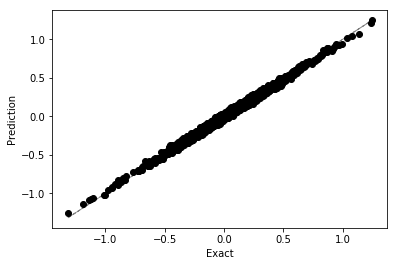

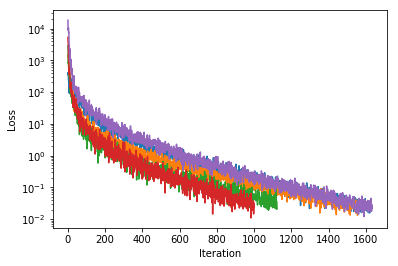

In [24]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1234)
if __name__ == "__main__":
    
    def gen_matrix(N, CondNum = 10.0):
        A = np.random.randn(N,N)
        U,S,V = np.linalg.svd(A)
        S[S!=0] = np.linspace(CondNum,1,N)
        A = np.matmul(U, np.matmul(np.diag(S), V.T))
        return A
    cnd = [5, 15, 25, 40, 50]
    fig444 = plt.figure(444)
    fig444.clf()
    ax444 = fig444.add_subplot(111)

    fig555 = plt.figure(555)
    fig555.clf()
    ax555 = fig555.add_subplot(111)


    for cn in cnd:
    # Generate data
        N = 512
        CondNum = cn
        A = gen_matrix(N, CondNum)
        b = np.random.randn(N,1)
        x_star = np.linalg.solve(A,b)
        
        # Define optimizer
        optimizer = SGD(N, lr = 1e-3)
        
        # Define model
        x0 = np.random.randn(N,1)
        model = LinearSystem(A, b, x0)
        
        # Solve
        x_pred = model.solve(optimizer, batch_size = 32, tol = 1e-2)
        
        # Print error
        error = np.linalg.norm(x_star - x_pred, 2)/np.linalg.norm(x_star, 2)
        print('Relative error: %e' % (error))
        
        # Plot
        ax444.plot(x_star, x_star, 'k--', linewidth = 1, alpha = 0.5)
        ax444.plot(x_star, x_pred, 'ko')
        ax444.set_xlabel('Exact')
        ax444.set_ylabel('Prediction')
        loss = np.asarray(model.loss_log)
        l = loss.mean(1)
        ax555.plot(l)
        ax555.set_xlabel('Iteration')
        ax555.set_ylabel('Loss')
        ax555.set_yscale('log')

The method does not converge for large values of the condition number because the matrix is coming closer to being singular. Also, the larger the condition number becomes the larger the iteration number needed for the problem to converge becomes.

# Problem 2



In [3]:
import itertools
import matplotlib.pyplot as plt
from autograd import grad
import pandas as pd
import numpy as np
from scipy.sparse import dia_matrix
from numpy.linalg import inv       
from pandas import read_csv

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
class IRLS:
    # Initialize model class
    def __init__(self, X_t, y_t, X_v, y_v):
      
        self.X = X_t
        self.y = y_t
        
        self.X_v = X_v
        self.y_v = y_v
        
        self.n = X_t.shape[0]

        #store the loss and # of iterations
        self.loss_log_t = []
        self.loss_log_v = []
        self.iterations = []
        
    # Fetches a mini-batch of data
    def fetch_minibatch(self, X, Y, N_batch):
        idx = np.random.choice(self.n, N_batch, replace=False)
        X_batch = X[idx,:]
        Y_batch = Y[idx,:]
        return X_batch, Y_batch
      
    def invlogit(self,eta):
        return(1.0/(1.0+np.exp(-eta)))
        
    def compute_loss(self, y_batch, a):
        loss = y_batch*np.log(a+ 1e-7) + (1. - y_batch)*np.log(1. - a + 1e-7)
        return -(1./y_batch.shape[0])*np.sum(loss)
    
    def IRLS_train(self, num_steps = 500, batch_size = 64):
    
        # Initialization
        X = self.X
        y = self.y

        n,p = X.shape
        W    = dia_matrix((batch_size,batch_size))        
        X_batch, y_batch =  self.fetch_minibatch(X, y, batch_size)
        
        d1 = inv(np.matmul(X_batch.T, X_batch))
        d2 = np.matmul(X_batch.T,y_batch)
        
        beta = np.matmul(d1,d2)  
        
        for it in range(0, num_steps):
            X_batch, y_batch =  self.fetch_minibatch(X, y, batch_size)

            ai = self.invlogit(np.matmul(X_batch, beta))
            
            l = np.multiply(ai,(1. - ai))
            W.setdiag(l.ravel())
            d1 = np.matmul(X_batch.T, W.toarray())
            d2 = np.matmul(d1,X_batch) + 1e-7*np.eye(p)
            d2 = inv(d2) 
            d3 = np.matmul(X_batch.T,(ai-y_batch))
            d4 = np.matmul(d2,d3)
            
            beta_star = beta - d4
                        
            loss_t = self.compute_loss(y_batch,ai)
            
            ai_v   = self.predict(self.X_v,beta)
            loss_v = self.compute_loss(self.y_v,ai_v)
            
            beta = beta_star
            
            if it % 1 == 0:
                self.loss_log_t.append(loss_t)
                self.loss_log_v.append(loss_v)
                self.iterations.append(it)
                print("Iteration: %d, Training Loss: %.3e , Validation Loss: %.3e" \
                      % (it, loss_t, loss_v))

            # Stochastic gradient descent update
        self.beta = beta
        #Store the loss function
        self.iterations = np.asarray(self.iterations)
        self.loss_log_t = np.asarray(self.loss_log_t)
        self.loss_log_t = np.reshape(self.loss_log_t, (self.iterations.shape[0], 1))
        self.loss_log_v = np.asarray(self.loss_log_v)
        self.loss_log_v = np.reshape(self.loss_log_v, (self.iterations.shape[0], 1))

        return beta

          
    def predict(self, X_star, beta):
        w = np.reshape(beta,(self.X.shape[1], 1))
        y_pred = self.sigmoid(np.matmul(X_star, w))
        return np.around(y_pred, decimals = 0) 
  
    # Logistic sigmoid function
    def sigmoid(self, x):
        return 0.5*(np.tanh(x) + 1.0)
    
    def accuracy(self, y_test, test_labels):
        # Compute confusion matrix
        self.M = confusion_matrix(y_test, test_labels)
        
        # False positives, False negatives, True positives, True negatives
        FP = self.M.sum(axis=0) - np.diag(self.M)  
        FN = self.M.sum(axis=1) - np.diag(self.M)
        TP = np.diag(self.M)
        TN = self.M.sum() - (FP + FN + TP)
                
        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)
        return ACC




Iteration: 0, Training Loss: 6.359e-01 , Validation Loss: 4.373e+00
Iteration: 1, Training Loss: 1.473e-01 , Validation Loss: 3.387e-01
Iteration: 2, Training Loss: 1.219e-01 , Validation Loss: 3.387e-01
Iteration: 3, Training Loss: 3.595e-02 , Validation Loss: 3.447e-01
Iteration: 4, Training Loss: 2.157e-02 , Validation Loss: 3.447e-01
Iteration: 5, Training Loss: 1.370e-01 , Validation Loss: 3.447e-01
Iteration: 6, Training Loss: 1.125e+00 , Validation Loss: 5.879e+00
Iteration: 7, Training Loss: 7.356e-01 , Validation Loss: 3.103e+00
Iteration: 8, Training Loss: 8.171e+00 , Validation Loss: 1.038e+01
Iteration: 9, Training Loss: 5.541e+00 , Validation Loss: 5.262e+00
Iteration: 10, Training Loss: 2.770e+00 , Validation Loss: 5.879e+00
Iteration: 11, Training Loss: 1.284e+01 , Validation Loss: 1.024e+01
Iteration: 12, Training Loss: 3.274e+00 , Validation Loss: 5.879e+00
Iteration: 13, Training Loss: 5.037e+00 , Validation Loss: 5.861e+00
Iteration: 14, Training Loss: 1.335e+01 , Va

/home/gkissas/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: overflow encountered in exp


Iteration: 129, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 130, Training Loss: 2.015e+00 , Validation Loss: 4.657e-01
Iteration: 131, Training Loss: 2.015e+00 , Validation Loss: 1.282e+00
Iteration: 132, Training Loss: 1.511e+00 , Validation Loss: 1.294e+00
Iteration: 133, Training Loss: 1.259e+00 , Validation Loss: 4.717e-01
Iteration: 134, Training Loss: 1.511e+00 , Validation Loss: 3.387e-01
Iteration: 135, Training Loss: 2.015e+00 , Validation Loss: 1.433e+00
Iteration: 136, Training Loss: 1.259e+00 , Validation Loss: 4.717e-01
Iteration: 137, Training Loss: 1.259e+00 , Validation Loss: 4.657e-01
Iteration: 138, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 139, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 140, Training Loss: 1.763e+00 , Validation Loss: 3.508e-01
Iteration: 141, Training Loss: 1.259e+00 , Validation Loss: 4.717e-01
Iteration: 142, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 143, Trai

Iteration: 253, Training Loss: 2.518e+00 , Validation Loss: 4.717e-01
Iteration: 254, Training Loss: 3.274e+00 , Validation Loss: 3.762e+00
Iteration: 255, Training Loss: 1.209e+01 , Validation Loss: 1.024e+01
Iteration: 256, Training Loss: 2.518e+00 , Validation Loss: 5.861e+00
Iteration: 257, Training Loss: 2.267e+00 , Validation Loss: 3.030e+00
Iteration: 258, Training Loss: 1.259e+00 , Validation Loss: 4.657e-01
Iteration: 259, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 260, Training Loss: 1.763e+00 , Validation Loss: 1.433e+00
Iteration: 261, Training Loss: 7.555e-01 , Validation Loss: 3.568e-01
Iteration: 262, Training Loss: 2.518e+00 , Validation Loss: 2.050e+00
Iteration: 263, Training Loss: 1.259e+01 , Validation Loss: 1.024e+01
Iteration: 264, Training Loss: 4.281e+00 , Validation Loss: 5.861e+00
Iteration: 265, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 266, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 267, Trai

Iteration: 427, Training Loss: 2.267e+00 , Validation Loss: 3.326e-01
Iteration: 428, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 429, Training Loss: 7.555e-01 , Validation Loss: 3.326e-01
Iteration: 430, Training Loss: 7.555e-01 , Validation Loss: 1.748e+00
Iteration: 431, Training Loss: 1.511e+00 , Validation Loss: 1.282e+00
Iteration: 432, Training Loss: 1.763e+00 , Validation Loss: 4.657e-01
Iteration: 433, Training Loss: 5.037e-01 , Validation Loss: 3.931e-01
Iteration: 434, Training Loss: 1.259e+00 , Validation Loss: 1.772e+00
Iteration: 435, Training Loss: 7.555e-01 , Validation Loss: 3.326e-01
Iteration: 436, Training Loss: 1.007e+00 , Validation Loss: 4.657e-01
Iteration: 437, Training Loss: 1.259e+00 , Validation Loss: 3.387e-01
Iteration: 438, Training Loss: 7.555e-01 , Validation Loss: 1.361e+00
Iteration: 439, Training Loss: 1.763e+00 , Validation Loss: 3.012e+00
Iteration: 440, Training Loss: 1.007e+00 , Validation Loss: 4.657e-01
Iteration: 441, Trai

Iteration: 638, Training Loss: 3.274e+00 , Validation Loss: 3.810e+00
Iteration: 639, Training Loss: 3.526e+00 , Validation Loss: 3.720e+00
Iteration: 640, Training Loss: 1.209e+01 , Validation Loss: 1.024e+01
Iteration: 641, Training Loss: 2.770e+00 , Validation Loss: 5.861e+00
Iteration: 642, Training Loss: 1.259e+00 , Validation Loss: 3.387e-01
Iteration: 643, Training Loss: 1.763e+00 , Validation Loss: 3.859e+00
Iteration: 644, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 645, Training Loss: 1.511e+00 , Validation Loss: 1.222e+00
Iteration: 646, Training Loss: 1.007e+00 , Validation Loss: 4.657e-01
Iteration: 647, Training Loss: 1.007e+00 , Validation Loss: 4.657e-01
Iteration: 648, Training Loss: 1.259e+00 , Validation Loss: 3.387e-01
Iteration: 649, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 650, Training Loss: 1.511e+00 , Validation Loss: 3.326e-01
Iteration: 651, Training Loss: 1.007e+00 , Validation Loss: 1.264e+00
Iteration: 652, Trai

Iteration: 830, Training Loss: 1.007e+00 , Validation Loss: 4.657e-01
Iteration: 831, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 832, Training Loss: 1.259e+00 , Validation Loss: 3.387e-01
Iteration: 833, Training Loss: 7.555e-01 , Validation Loss: 4.657e-01
Iteration: 834, Training Loss: 5.037e-01 , Validation Loss: 3.387e-01
Iteration: 835, Training Loss: 3.022e+00 , Validation Loss: 4.772e+00
Iteration: 836, Training Loss: 1.385e+01 , Validation Loss: 1.024e+01
Iteration: 837, Training Loss: 2.267e+00 , Validation Loss: 5.867e+00
Iteration: 838, Training Loss: 3.274e+00 , Validation Loss: 3.193e+00
Iteration: 839, Training Loss: 1.310e+01 , Validation Loss: 1.024e+01
Iteration: 840, Training Loss: 3.778e+00 , Validation Loss: 5.867e+00
Iteration: 841, Training Loss: 2.518e-01 , Validation Loss: 9.254e-01
Iteration: 842, Training Loss: 1.763e+00 , Validation Loss: 1.325e+00
Iteration: 843, Training Loss: 1.511e+00 , Validation Loss: 3.326e-01
Iteration: 844, Trai

Iteration: 957, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 958, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 959, Training Loss: 1.007e+00 , Validation Loss: 3.326e-01
Iteration: 960, Training Loss: 1.007e+00 , Validation Loss: 3.326e-01
Iteration: 961, Training Loss: 1.259e+00 , Validation Loss: 1.464e+00
Iteration: 962, Training Loss: 7.555e-01 , Validation Loss: 4.657e-01
Iteration: 963, Training Loss: 5.037e-01 , Validation Loss: 4.657e-01
Iteration: 964, Training Loss: 1.007e+00 , Validation Loss: 4.657e-01
Iteration: 965, Training Loss: 1.763e+00 , Validation Loss: 3.387e-01
Iteration: 966, Training Loss: 2.518e-01 , Validation Loss: 1.173e+00
Iteration: 967, Training Loss: 1.259e+00 , Validation Loss: 1.415e+00
Iteration: 968, Training Loss: 5.037e-01 , Validation Loss: 3.568e-01
Iteration: 969, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 970, Training Loss: 1.259e+00 , Validation Loss: 3.387e-01
Iteration: 971, Trai

Iteration: 1122, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 1123, Training Loss: 5.037e-01 , Validation Loss: 3.387e-01
Iteration: 1124, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 1125, Training Loss: 3.526e+00 , Validation Loss: 4.929e+00
Iteration: 1126, Training Loss: 1.259e+01 , Validation Loss: 1.024e+01
Iteration: 1127, Training Loss: 3.778e+00 , Validation Loss: 5.861e+00
Iteration: 1128, Training Loss: 2.518e+00 , Validation Loss: 4.657e-01
Iteration: 1129, Training Loss: 1.259e+00 , Validation Loss: 3.326e-01
Iteration: 1130, Training Loss: 2.015e+00 , Validation Loss: 3.568e-01
Iteration: 1131, Training Loss: 1.511e+00 , Validation Loss: 1.911e+00
Iteration: 1132, Training Loss: 1.763e+00 , Validation Loss: 4.657e-01
Iteration: 1133, Training Loss: -1.000e-07 , Validation Loss: 3.387e-01
Iteration: 1134, Training Loss: 1.259e+00 , Validation Loss: 3.387e-01
Iteration: 1135, Training Loss: 2.267e+00 , Validation Loss: 1.778e+00
Itera

Iteration: 1246, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 1247, Training Loss: 3.526e+00 , Validation Loss: 4.766e+00
Iteration: 1248, Training Loss: 1.209e+01 , Validation Loss: 1.024e+01
Iteration: 1249, Training Loss: 4.030e+00 , Validation Loss: 5.861e+00
Iteration: 1250, Training Loss: 2.267e+00 , Validation Loss: 1.506e+00
Iteration: 1251, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 1252, Training Loss: 5.037e-01 , Validation Loss: 3.387e-01
Iteration: 1253, Training Loss: 1.007e+00 , Validation Loss: 3.326e-01
Iteration: 1254, Training Loss: 2.267e+00 , Validation Loss: 1.633e+00
Iteration: 1255, Training Loss: 1.259e+00 , Validation Loss: 4.657e-01
Iteration: 1256, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 1257, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 1258, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 1259, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iterat

Iteration: 1433, Training Loss: 3.274e+00 , Validation Loss: 3.030e+00
Iteration: 1434, Training Loss: 1.259e+01 , Validation Loss: 1.024e+01
Iteration: 1435, Training Loss: 2.518e+00 , Validation Loss: 5.861e+00
Iteration: 1436, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 1437, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 1438, Training Loss: 5.037e-01 , Validation Loss: 3.387e-01
Iteration: 1439, Training Loss: 5.037e-01 , Validation Loss: 3.387e-01
Iteration: 1440, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 1441, Training Loss: 1.007e+00 , Validation Loss: 3.568e-01
Iteration: 1442, Training Loss: 1.511e+00 , Validation Loss: 3.387e-01
Iteration: 1443, Training Loss: 2.770e+00 , Validation Loss: 2.752e+00
Iteration: 1444, Training Loss: 1.007e+00 , Validation Loss: 1.790e+00
Iteration: 1445, Training Loss: 2.267e+00 , Validation Loss: 7.439e-01
Iteration: 1446, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iterat

Iteration: 1575, Training Loss: 1.511e+00 , Validation Loss: 1.191e+00
Iteration: 1576, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 1577, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 1578, Training Loss: 1.511e+00 , Validation Loss: 3.411e+00
Iteration: 1579, Training Loss: 1.763e+00 , Validation Loss: 1.681e+00
Iteration: 1580, Training Loss: 5.037e-01 , Validation Loss: 3.387e-01
Iteration: 1581, Training Loss: 1.511e+00 , Validation Loss: 1.621e+00
Iteration: 1582, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 1583, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 1584, Training Loss: 3.022e+00 , Validation Loss: 5.292e+00
Iteration: 1585, Training Loss: 7.555e+00 , Validation Loss: 1.024e+01
Iteration: 1586, Training Loss: 2.770e+00 , Validation Loss: 5.026e+00
Iteration: 1587, Training Loss: 3.022e+00 , Validation Loss: 1.772e+00
Iteration: 1588, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iterat

Iteration: 1726, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 1727, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 1728, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 1729, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 1730, Training Loss: 3.526e+00 , Validation Loss: 3.453e+00
Iteration: 1731, Training Loss: 1.360e+01 , Validation Loss: 1.024e+01
Iteration: 1732, Training Loss: 3.274e+00 , Validation Loss: 5.861e+00
Iteration: 1733, Training Loss: 7.555e-01 , Validation Loss: 4.657e-01
Iteration: 1734, Training Loss: 1.007e+00 , Validation Loss: 4.657e-01
Iteration: 1735, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 1736, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 1737, Training Loss: 1.511e+00 , Validation Loss: 3.387e-01
Iteration: 1738, Training Loss: 2.015e+00 , Validation Loss: 2.637e+00
Iteration: 1739, Training Loss: 5.037e-01 , Validation Loss: 4.657e-01
Itera

Iteration: 1842, Training Loss: 2.518e+00 , Validation Loss: 2.824e+00
Iteration: 1843, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 1844, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 1845, Training Loss: 2.770e+00 , Validation Loss: 2.026e+00
Iteration: 1846, Training Loss: 6.548e+00 , Validation Loss: 5.607e+00
Iteration: 1847, Training Loss: 2.015e+00 , Validation Loss: 4.724e+00
Iteration: 1848, Training Loss: 1.007e+00 , Validation Loss: 4.657e-01
Iteration: 1849, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 1850, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 1851, Training Loss: 3.022e+00 , Validation Loss: 3.732e+00
Iteration: 1852, Training Loss: 1.209e+01 , Validation Loss: 1.024e+01
Iteration: 1853, Training Loss: 3.022e+00 , Validation Loss: 5.861e+00
Iteration: 1854, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 1855, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iterat

Iteration: 2036, Training Loss: 1.259e+00 , Validation Loss: 4.657e-01
Iteration: 2037, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 2038, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2039, Training Loss: 2.518e-01 , Validation Loss: 1.488e+00
Iteration: 2040, Training Loss: 1.259e+00 , Validation Loss: 3.447e-01
Iteration: 2041, Training Loss: 2.518e+00 , Validation Loss: 3.998e+00
Iteration: 2042, Training Loss: 2.267e+00 , Validation Loss: 3.961e+00
Iteration: 2043, Training Loss: 1.511e+00 , Validation Loss: 5.806e-01
Iteration: 2044, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 2045, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 2046, Training Loss: 1.763e+00 , Validation Loss: 2.873e+00
Iteration: 2047, Training Loss: 1.511e+00 , Validation Loss: 9.919e-01
Iteration: 2048, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 2049, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iterat

Iteration: 2200, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 2201, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2202, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 2203, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 2204, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 2205, Training Loss: 1.511e+00 , Validation Loss: 1.827e+00
Iteration: 2206, Training Loss: 1.259e+00 , Validation Loss: 1.040e+00
Iteration: 2207, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 2208, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 2209, Training Loss: 2.518e-01 , Validation Loss: 5.262e-01
Iteration: 2210, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 2211, Training Loss: 3.274e+00 , Validation Loss: 4.572e+00
Iteration: 2212, Training Loss: 1.310e+01 , Validation Loss: 1.024e+01
Iteration: 2213, Training Loss: 4.785e+00 , Validation Loss: 5.861e+00
Ite

Iteration: 2354, Training Loss: 2.015e+00 , Validation Loss: 9.133e-01
Iteration: 2355, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2356, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 2357, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 2358, Training Loss: 1.007e+00 , Validation Loss: 1.820e+00
Iteration: 2359, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 2360, Training Loss: 1.511e+00 , Validation Loss: 1.512e+00
Iteration: 2361, Training Loss: 1.007e+00 , Validation Loss: 1.204e+00
Iteration: 2362, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 2363, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 2364, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 2365, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2366, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 2367, Training Loss: -1.000e-07 , Validation Loss: 4.657e-01
Iter

Iteration: 2490, Training Loss: 2.770e+00 , Validation Loss: 4.536e+00
Iteration: 2491, Training Loss: 5.289e+00 , Validation Loss: 4.917e+00
Iteration: 2492, Training Loss: 1.763e+00 , Validation Loss: 3.961e+00
Iteration: 2493, Training Loss: 5.037e-01 , Validation Loss: 4.657e-01
Iteration: 2494, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2495, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 2496, Training Loss: 1.007e+00 , Validation Loss: 1.591e+00
Iteration: 2497, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 2498, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 2499, Training Loss: 5.037e-01 , Validation Loss: 1.191e+00
Iteration: 2500, Training Loss: 5.037e-01 , Validation Loss: 3.871e-01
Iteration: 2501, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 2502, Training Loss: 1.259e+00 , Validation Loss: 3.508e-01
Iteration: 2503, Training Loss: 4.281e+00 , Validation Loss: 5.080e+00
Iterat

Iteration: 2629, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2630, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 2631, Training Loss: 3.274e+00 , Validation Loss: 4.566e+00
Iteration: 2632, Training Loss: 1.083e+01 , Validation Loss: 1.024e+01
Iteration: 2633, Training Loss: 1.511e+00 , Validation Loss: 5.861e+00
Iteration: 2634, Training Loss: 7.555e-01 , Validation Loss: 1.300e+00
Iteration: 2635, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 2636, Training Loss: 7.555e-01 , Validation Loss: 1.131e+00
Iteration: 2637, Training Loss: 5.037e-01 , Validation Loss: 3.931e-01
Iteration: 2638, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 2639, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 2640, Training Loss: 1.763e+00 , Validation Loss: 2.389e+00
Iteration: 2641, Training Loss: 7.555e-01 , Validation Loss: 4.657e-01
Iteration: 2642, Training Loss: 1.007e+00 , Validation Loss: 3.810e-01
Iterat

Iteration: 2792, Training Loss: 1.511e+00 , Validation Loss: 2.093e+00
Iteration: 2793, Training Loss: 2.770e+00 , Validation Loss: 9.072e-01
Iteration: 2794, Training Loss: 4.030e+00 , Validation Loss: 5.588e+00
Iteration: 2795, Training Loss: 6.044e+00 , Validation Loss: 1.017e+01
Iteration: 2796, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 2797, Training Loss: 1.007e+00 , Validation Loss: 1.603e+00
Iteration: 2798, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 2799, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 2800, Training Loss: 2.015e+00 , Validation Loss: 3.883e+00
Iteration: 2801, Training Loss: 7.555e-01 , Validation Loss: 4.657e-01
Iteration: 2802, Training Loss: 5.037e-01 , Validation Loss: 3.931e-01
Iteration: 2803, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 2804, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 2805, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iterat

Iteration: 2960, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2961, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 2962, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 2963, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2964, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2965, Training Loss: 1.007e+00 , Validation Loss: 5.685e-01
Iteration: 2966, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2967, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 2968, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 2969, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 2970, Training Loss: 3.274e+00 , Validation Loss: 4.040e+00
Iteration: 2971, Training Loss: 8.311e+00 , Validation Loss: 8.612e+00
Iteration: 2972, Training Loss: 4.533e+00 , Validation Loss: 5.788e+00
Iteration: 2973, Training Loss: 8.815e+00 , Validation Loss: 1.024e+01
Itera

Iteration: 3157, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 3158, Training Loss: 2.267e+00 , Validation Loss: 4.439e+00
Iteration: 3159, Training Loss: 2.518e+00 , Validation Loss: 2.099e+00
Iteration: 3160, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 3161, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 3162, Training Loss: 1.763e+00 , Validation Loss: 3.085e+00
Iteration: 3163, Training Loss: 7.555e-01 , Validation Loss: 6.713e-01
Iteration: 3164, Training Loss: 1.259e+00 , Validation Loss: 4.355e-01
Iteration: 3165, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 3166, Training Loss: 1.259e+00 , Validation Loss: 2.909e+00
Iteration: 3167, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 3168, Training Loss: 7.555e-01 , Validation Loss: 4.052e-01
Iteration: 3169, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 3170, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iterat

Iteration: 3323, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 3324, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 3325, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 3326, Training Loss: 7.555e-01 , Validation Loss: 2.867e+00
Iteration: 3327, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 3328, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 3329, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 3330, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 3331, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 3332, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 3333, Training Loss: 5.037e-01 , Validation Loss: 5.746e-01
Iteration: 3334, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 3335, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 3336, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Ite

Iteration: 3441, Training Loss: -1.000e-07 , Validation Loss: 4.838e-01
Iteration: 3442, Training Loss: 2.518e-01 , Validation Loss: 4.838e-01
Iteration: 3443, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 3444, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 3445, Training Loss: 7.555e-01 , Validation Loss: 3.629e-01
Iteration: 3446, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 3447, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 3448, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 3449, Training Loss: 2.267e+00 , Validation Loss: 3.254e+00
Iteration: 3450, Training Loss: 1.763e+00 , Validation Loss: 3.574e+00
Iteration: 3451, Training Loss: 7.555e-01 , Validation Loss: 7.923e-01
Iteration: 3452, Training Loss: 7.555e-01 , Validation Loss: 5.262e-01
Iteration: 3453, Training Loss: 7.555e-01 , Validation Loss: 3.750e-01
Iteration: 3454, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iter

Iteration: 3582, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 3583, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 3584, Training Loss: 3.274e+00 , Validation Loss: 4.119e+00
Iteration: 3585, Training Loss: 5.541e+00 , Validation Loss: 5.740e+00
Iteration: 3586, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 3587, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 3588, Training Loss: 2.518e+00 , Validation Loss: 4.264e+00
Iteration: 3589, Training Loss: 2.267e+00 , Validation Loss: 1.185e+00
Iteration: 3590, Training Loss: 1.511e+00 , Validation Loss: 3.085e+00
Iteration: 3591, Training Loss: 2.518e-01 , Validation Loss: 4.657e-01
Iteration: 3592, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 3593, Training Loss: 1.259e+00 , Validation Loss: 3.447e-01
Iteration: 3594, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 3595, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iter

Iteration: 3764, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 3765, Training Loss: 1.259e+00 , Validation Loss: 1.046e+00
Iteration: 3766, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 3767, Training Loss: 7.555e-01 , Validation Loss: 1.385e+00
Iteration: 3768, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 3769, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 3770, Training Loss: 1.007e+00 , Validation Loss: 3.212e+00
Iteration: 3771, Training Loss: -1.000e-07 , Validation Loss: 4.717e-01
Iteration: 3772, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 3773, Training Loss: -1.000e-07 , Validation Loss: 4.657e-01
Iteration: 3774, Training Loss: 7.555e-01 , Validation Loss: 4.657e-01
Iteration: 3775, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 3776, Training Loss: 2.518e-01 , Validation Loss: 3.871e-01
Iteration: 3777, Training Loss: 7.555e-01 , Validation Loss: 1.028e+00
Iter

Iteration: 3951, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 3952, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 3953, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 3954, Training Loss: 7.555e-01 , Validation Loss: 4.234e-01
Iteration: 3955, Training Loss: -1.000e-07 , Validation Loss: 4.052e-01
Iteration: 3956, Training Loss: 7.555e-01 , Validation Loss: 4.052e-01
Iteration: 3957, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 3958, Training Loss: 2.015e+00 , Validation Loss: 4.209e+00
Iteration: 3959, Training Loss: 1.007e+00 , Validation Loss: 9.072e-01
Iteration: 3960, Training Loss: 1.511e+00 , Validation Loss: 4.717e-01
Iteration: 3961, Training Loss: 2.267e+00 , Validation Loss: 5.171e+00
Iteration: 3962, Training Loss: 1.007e+00 , Validation Loss: 1.766e+00
Iteration: 3963, Training Loss: 1.259e+00 , Validation Loss: 8.528e-01
Iteration: 3964, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Itera

Iteration: 4141, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 4142, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 4143, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 4144, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 4145, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 4146, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 4147, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 4148, Training Loss: 1.259e+00 , Validation Loss: 2.117e+00
Iteration: 4149, Training Loss: 5.037e-01 , Validation Loss: 4.052e-01
Iteration: 4150, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4151, Training Loss: 7.555e-01 , Validation Loss: 3.387e-01
Iteration: 4152, Training Loss: 5.037e-01 , Validation Loss: 8.165e-01
Iteration: 4153, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 4154, Training Loss: -1.000e-07 , Validation Loss: 3.387e-01
Itera

Iteration: 4286, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 4287, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4288, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 4289, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 4290, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4291, Training Loss: 7.555e-01 , Validation Loss: 2.220e+00
Iteration: 4292, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4293, Training Loss: 5.037e-01 , Validation Loss: 8.165e-01
Iteration: 4294, Training Loss: 7.555e-01 , Validation Loss: 8.951e-01
Iteration: 4295, Training Loss: 3.022e+00 , Validation Loss: 4.288e+00
Iteration: 4296, Training Loss: 7.304e+00 , Validation Loss: 8.304e+00
Iteration: 4297, Training Loss: 4.533e+00 , Validation Loss: 5.141e+00
Iteration: 4298, Training Loss: 5.289e+00 , Validation Loss: 4.560e+00
Iteration: 4299, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Itera

Iteration: 4450, Training Loss: 3.274e+00 , Validation Loss: 4.415e+00
Iteration: 4451, Training Loss: 7.052e+00 , Validation Loss: 9.725e+00
Iteration: 4452, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4453, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4454, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 4455, Training Loss: 1.259e+00 , Validation Loss: 3.508e-01
Iteration: 4456, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4457, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 4458, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4459, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 4460, Training Loss: 5.037e-01 , Validation Loss: 2.147e+00
Iteration: 4461, Training Loss: 2.518e-01 , Validation Loss: 1.034e+00
Iteration: 4462, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4463, Training Loss: 5.037e-01 , Validation Loss: 2.788e+00
Itera

Iteration: 4576, Training Loss: 1.007e+00 , Validation Loss: 2.516e+00
Iteration: 4577, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 4578, Training Loss: 1.007e+00 , Validation Loss: 6.048e-01
Iteration: 4579, Training Loss: 3.022e+00 , Validation Loss: 5.008e+00
Iteration: 4580, Training Loss: 2.770e+00 , Validation Loss: 1.899e+00
Iteration: 4581, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4582, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 4583, Training Loss: 7.555e-01 , Validation Loss: 3.012e+00
Iteration: 4584, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 4585, Training Loss: 5.037e-01 , Validation Loss: 1.077e+00
Iteration: 4586, Training Loss: 7.555e-01 , Validation Loss: 3.992e-01
Iteration: 4587, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 4588, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 4589, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Itera

Iteration: 4693, Training Loss: -1.000e-07 , Validation Loss: 4.355e-01
Iteration: 4694, Training Loss: 2.518e-01 , Validation Loss: 4.355e-01
Iteration: 4695, Training Loss: 2.518e-01 , Validation Loss: 1.621e+00
Iteration: 4696, Training Loss: 2.518e-01 , Validation Loss: 6.774e-01
Iteration: 4697, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 4698, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 4699, Training Loss: 1.007e+00 , Validation Loss: 4.717e-01
Iteration: 4700, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 4701, Training Loss: 2.518e-01 , Validation Loss: 7.621e-01
Iteration: 4702, Training Loss: 7.555e-01 , Validation Loss: 3.230e+00
Iteration: 4703, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 4704, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 4705, Training Loss: 1.007e+00 , Validation Loss: 5.685e-01
Iteration: 4706, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iter

Iteration: 4844, Training Loss: 7.555e-01 , Validation Loss: 4.052e-01
Iteration: 4845, Training Loss: 1.007e+00 , Validation Loss: 1.095e+00
Iteration: 4846, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 4847, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 4848, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 4849, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 4850, Training Loss: 2.518e-01 , Validation Loss: 5.322e-01
Iteration: 4851, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 4852, Training Loss: 1.007e+00 , Validation Loss: 2.377e+00
Iteration: 4853, Training Loss: -1.000e-07 , Validation Loss: 3.871e-01
Iteration: 4854, Training Loss: 1.007e+00 , Validation Loss: 3.871e-01
Iteration: 4855, Training Loss: 1.259e+00 , Validation Loss: 7.862e-01
Iteration: 4856, Training Loss: 7.555e-01 , Validation Loss: 7.742e-01
Iteration: 4857, Training Loss: 5.037e-01 , Validation Loss: 6.653e-01
Ite

Iteration: 4986, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4987, Training Loss: 5.037e-01 , Validation Loss: 3.750e-01
Iteration: 4988, Training Loss: 3.274e+00 , Validation Loss: 4.258e+00
Iteration: 4989, Training Loss: 2.267e+00 , Validation Loss: 3.599e+00
Iteration: 4990, Training Loss: 5.037e-01 , Validation Loss: 6.290e-01
Iteration: 4991, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 4992, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 4993, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 4994, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 4995, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 4996, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 4997, Training Loss: 2.518e-01 , Validation Loss: 4.778e-01
Iteration: 4998, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 4999, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Itera

Iteration: 5120, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5121, Training Loss: 7.555e-01 , Validation Loss: 5.927e-01
Iteration: 5122, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 5123, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 5124, Training Loss: 1.259e+00 , Validation Loss: 4.959e-01
Iteration: 5125, Training Loss: 3.526e+00 , Validation Loss: 5.189e+00
Iteration: 5126, Training Loss: 1.184e+01 , Validation Loss: 1.024e+01
Iteration: 5127, Training Loss: 3.526e+00 , Validation Loss: 5.861e+00
Iteration: 5128, Training Loss: 1.763e+00 , Validation Loss: 1.409e+00
Iteration: 5129, Training Loss: 2.267e+00 , Validation Loss: 4.717e-01
Iteration: 5130, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 5131, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 5132, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 5133, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Itera

Iteration: 5250, Training Loss: 5.037e-01 , Validation Loss: 3.629e-01
Iteration: 5251, Training Loss: 5.037e-01 , Validation Loss: 3.750e-01
Iteration: 5252, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 5253, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 5254, Training Loss: 1.007e+00 , Validation Loss: 7.076e-01
Iteration: 5255, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 5256, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 5257, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 5258, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 5259, Training Loss: 2.518e-01 , Validation Loss: 4.536e-01
Iteration: 5260, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 5261, Training Loss: 5.037e-01 , Validation Loss: 6.290e-01
Iteration: 5262, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 5263, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Ite

Iteration: 5427, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5428, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 5429, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5430, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 5431, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5432, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 5433, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 5434, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 5435, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 5436, Training Loss: 2.015e+00 , Validation Loss: 3.683e+00
Iteration: 5437, Training Loss: 2.015e+00 , Validation Loss: 4.717e-01
Iteration: 5438, Training Loss: 7.555e-01 , Validation Loss: 2.032e+00
Iteration: 5439, Training Loss: 1.007e+00 , Validation Loss: 7.560e-01
Iteration: 5440, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
It

Iteration: 5614, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 5615, Training Loss: 7.555e-01 , Validation Loss: 2.214e+00
Iteration: 5616, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 5617, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 5618, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5619, Training Loss: 5.037e-01 , Validation Loss: 9.495e-01
Iteration: 5620, Training Loss: 1.511e+00 , Validation Loss: 3.187e+00
Iteration: 5621, Training Loss: 7.555e-01 , Validation Loss: 6.653e-01
Iteration: 5622, Training Loss: 1.511e+00 , Validation Loss: 4.717e-01
Iteration: 5623, Training Loss: -1.000e-07 , Validation Loss: 7.379e-01
Iteration: 5624, Training Loss: -1.000e-07 , Validation Loss: 7.379e-01
Iteration: 5625, Training Loss: -1.000e-07 , Validation Loss: 7.379e-01
Iteration: 5626, Training Loss: 2.518e-01 , Validation Loss: 7.379e-01
Iteration: 5627, Training Loss: 1.007e+00 , Validation Loss: 2.008e+00
Ite

Iteration: 5822, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 5823, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 5824, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5825, Training Loss: 7.555e-01 , Validation Loss: 1.566e+00
Iteration: 5826, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 5827, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 5828, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5829, Training Loss: 1.259e+00 , Validation Loss: 1.554e+00
Iteration: 5830, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5831, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 5832, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5833, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 5834, Training Loss: 1.007e+00 , Validation Loss: 8.709e-01
Iteration: 5835, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iter

Iteration: 5975, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 5976, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 5977, Training Loss: 1.763e+00 , Validation Loss: 3.641e+00
Iteration: 5978, Training Loss: 2.015e+00 , Validation Loss: 1.736e+00
Iteration: 5979, Training Loss: 7.555e-01 , Validation Loss: 4.838e-01
Iteration: 5980, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 5981, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 5982, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 5983, Training Loss: -1.000e-07 , Validation Loss: 3.568e-01
Iteration: 5984, Training Loss: -1.000e-07 , Validation Loss: 3.568e-01
Iteration: 5985, Training Loss: -1.000e-07 , Validation Loss: 3.568e-01
Iteration: 5986, Training Loss: 7.555e-01 , Validation Loss: 3.568e-01
Iteration: 5987, Training Loss: 5.037e-01 , Validation Loss: 8.044e-01
Iteration: 5988, Training Loss: 2.518e-01 , Validation Loss: 8.044e-01
I

Iteration: 6164, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6165, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 6166, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 6167, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6168, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 6169, Training Loss: 7.555e-01 , Validation Loss: 5.746e-01
Iteration: 6170, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 6171, Training Loss: 5.037e-01 , Validation Loss: 5.806e-01
Iteration: 6172, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 6173, Training Loss: -1.000e-07 , Validation Loss: 3.568e-01
Iteration: 6174, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 6175, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6176, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6177, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
I

Iteration: 6281, Training Loss: 2.518e-01 , Validation Loss: 3.992e-01
Iteration: 6282, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 6283, Training Loss: 2.518e-01 , Validation Loss: 3.871e-01
Iteration: 6284, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 6285, Training Loss: 7.555e-01 , Validation Loss: 4.597e-01
Iteration: 6286, Training Loss: 7.555e-01 , Validation Loss: 4.838e-01
Iteration: 6287, Training Loss: 2.015e+00 , Validation Loss: 4.494e+00
Iteration: 6288, Training Loss: 5.037e-01 , Validation Loss: 1.331e+00
Iteration: 6289, Training Loss: 1.763e+00 , Validation Loss: 9.495e-01
Iteration: 6290, Training Loss: 1.259e+00 , Validation Loss: 1.373e+00
Iteration: 6291, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 6292, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 6293, Training Loss: 2.518e-01 , Validation Loss: 5.867e-01
Iteration: 6294, Training Loss: 2.518e-01 , Validation Loss: 1.409e+00
Iterat

Iteration: 6477, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6478, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 6479, Training Loss: 5.037e-01 , Validation Loss: 7.379e-01
Iteration: 6480, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 6481, Training Loss: 1.259e+00 , Validation Loss: 3.508e-01
Iteration: 6482, Training Loss: 2.015e+00 , Validation Loss: 4.131e+00
Iteration: 6483, Training Loss: 1.259e+00 , Validation Loss: 1.246e+00
Iteration: 6484, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 6485, Training Loss: -1.000e-07 , Validation Loss: 3.750e-01
Iteration: 6486, Training Loss: 7.555e-01 , Validation Loss: 3.750e-01
Iteration: 6487, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 6488, Training Loss: 5.037e-01 , Validation Loss: 5.988e-01
Iteration: 6489, Training Loss: 1.007e+00 , Validation Loss: 2.443e+00
Iteration: 6490, Training Loss: 2.518e-01 , Validation Loss: 3.750e-01
Iter

Iteration: 6620, Training Loss: -1.000e-07 , Validation Loss: 5.685e-01
Iteration: 6621, Training Loss: -1.000e-07 , Validation Loss: 5.685e-01
Iteration: 6622, Training Loss: 2.518e-01 , Validation Loss: 5.685e-01
Iteration: 6623, Training Loss: 1.007e+00 , Validation Loss: 1.379e+00
Iteration: 6624, Training Loss: 7.555e-01 , Validation Loss: 3.568e-01
Iteration: 6625, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 6626, Training Loss: -1.000e-07 , Validation Loss: 3.871e-01
Iteration: 6627, Training Loss: 7.555e-01 , Validation Loss: 3.871e-01
Iteration: 6628, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6629, Training Loss: 1.259e+00 , Validation Loss: 3.508e-01
Iteration: 6630, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 6631, Training Loss: 7.555e-01 , Validation Loss: 4.657e-01
Iteration: 6632, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 6633, Training Loss: 2.518e-01 , Validation Loss: 6.774e-01
It

Iteration: 6791, Training Loss: 5.037e-01 , Validation Loss: 5.564e-01
Iteration: 6792, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 6793, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 6794, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 6795, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 6796, Training Loss: 1.259e+00 , Validation Loss: 1.077e+00
Iteration: 6797, Training Loss: 5.037e-01 , Validation Loss: 4.052e-01
Iteration: 6798, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 6799, Training Loss: 1.007e+00 , Validation Loss: 5.383e-01
Iteration: 6800, Training Loss: 1.511e+00 , Validation Loss: 4.270e+00
Iteration: 6801, Training Loss: 1.259e+00 , Validation Loss: 4.717e-01
Iteration: 6802, Training Loss: 5.037e-01 , Validation Loss: 5.685e-01
Iteration: 6803, Training Loss: -1.000e-07 , Validation Loss: 7.621e-01
Iteration: 6804, Training Loss: 5.037e-01 , Validation Loss: 7.621e-01
Itera

Iteration: 6918, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 6919, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6920, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6921, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 6922, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 6923, Training Loss: 5.037e-01 , Validation Loss: 2.734e+00
Iteration: 6924, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 6925, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 6926, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 6927, Training Loss: 5.037e-01 , Validation Loss: 4.234e-01
Iteration: 6928, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 6929, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6930, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 6931, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
I

Iteration: 7069, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 7070, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7071, Training Loss: 7.555e-01 , Validation Loss: 6.653e-01
Iteration: 7072, Training Loss: 2.518e-01 , Validation Loss: 4.052e-01
Iteration: 7073, Training Loss: 2.518e-01 , Validation Loss: 7.500e-01
Iteration: 7074, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 7075, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 7076, Training Loss: 7.555e-01 , Validation Loss: 9.556e-01
Iteration: 7077, Training Loss: 2.518e-01 , Validation Loss: 5.443e-01
Iteration: 7078, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 7079, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7080, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 7081, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 7082, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Ite

Iteration: 7201, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7202, Training Loss: 5.037e-01 , Validation Loss: 4.113e-01
Iteration: 7203, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 7204, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 7205, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 7206, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 7207, Training Loss: -1.000e-07 , Validation Loss: 5.685e-01
Iteration: 7208, Training Loss: 5.037e-01 , Validation Loss: 5.685e-01
Iteration: 7209, Training Loss: 7.555e-01 , Validation Loss: 7.318e-01
Iteration: 7210, Training Loss: 2.518e-01 , Validation Loss: 3.931e-01
Iteration: 7211, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 7212, Training Loss: 1.007e+00 , Validation Loss: 1.071e+00
Iteration: 7213, Training Loss: 5.037e-01 , Validation Loss: 4.052e-01
Iteration: 7214, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Ite

Iteration: 7382, Training Loss: 1.007e+00 , Validation Loss: 6.290e-01
Iteration: 7383, Training Loss: -1.000e-07 , Validation Loss: 4.415e-01
Iteration: 7384, Training Loss: 1.007e+00 , Validation Loss: 4.415e-01
Iteration: 7385, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7386, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 7387, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 7388, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 7389, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 7390, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7391, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 7392, Training Loss: 4.030e+00 , Validation Loss: 3.980e+00
Iteration: 7393, Training Loss: 1.234e+01 , Validation Loss: 1.024e+01
Iteration: 7394, Training Loss: 2.267e+00 , Validation Loss: 5.649e+00
Iteration: 7395, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Ite

Iteration: 7539, Training Loss: -1.000e-07 , Validation Loss: 8.951e-01
Iteration: 7540, Training Loss: 5.037e-01 , Validation Loss: 8.951e-01
Iteration: 7541, Training Loss: 3.022e+00 , Validation Loss: 3.441e+00
Iteration: 7542, Training Loss: 1.763e+00 , Validation Loss: 4.191e+00
Iteration: 7543, Training Loss: 2.770e+00 , Validation Loss: 1.427e+00
Iteration: 7544, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 7545, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 7546, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 7547, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 7548, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7549, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7550, Training Loss: 2.518e-01 , Validation Loss: 5.020e-01
Iteration: 7551, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7552, Training Loss: 2.518e-01 , Validation Loss: 6.290e-01
Iter

Iteration: 7696, Training Loss: 7.555e-01 , Validation Loss: 4.052e-01
Iteration: 7697, Training Loss: 7.555e-01 , Validation Loss: 8.770e-01
Iteration: 7698, Training Loss: -1.000e-07 , Validation Loss: 7.076e-01
Iteration: 7699, Training Loss: -1.000e-07 , Validation Loss: 7.076e-01
Iteration: 7700, Training Loss: 7.555e-01 , Validation Loss: 7.076e-01
Iteration: 7701, Training Loss: 2.518e-01 , Validation Loss: 5.625e-01
Iteration: 7702, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7703, Training Loss: 1.007e+00 , Validation Loss: 7.258e-01
Iteration: 7704, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7705, Training Loss: 7.555e-01 , Validation Loss: 6.230e-01
Iteration: 7706, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 7707, Training Loss: 2.518e-01 , Validation Loss: 4.597e-01
Iteration: 7708, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 7709, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Ite

Iteration: 7861, Training Loss: 1.007e+00 , Validation Loss: 9.254e-01
Iteration: 7862, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 7863, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7864, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7865, Training Loss: 7.555e-01 , Validation Loss: 7.016e-01
Iteration: 7866, Training Loss: 5.037e-01 , Validation Loss: 2.093e+00
Iteration: 7867, Training Loss: 2.518e-01 , Validation Loss: 3.931e-01
Iteration: 7868, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 7869, Training Loss: 2.518e-01 , Validation Loss: 5.685e-01
Iteration: 7870, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 7871, Training Loss: 5.037e-01 , Validation Loss: 7.923e-01
Iteration: 7872, Training Loss: 2.518e-01 , Validation Loss: 8.891e-01
Iteration: 7873, Training Loss: 5.037e-01 , Validation Loss: 5.504e-01
Iteration: 7874, Training Loss: 7.555e-01 , Validation Loss: 6.169e-01
Itera

Iteration: 8056, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 8057, Training Loss: 7.555e-01 , Validation Loss: 6.411e-01
Iteration: 8058, Training Loss: 2.518e-01 , Validation Loss: 4.355e-01
Iteration: 8059, Training Loss: 7.555e-01 , Validation Loss: 2.897e+00
Iteration: 8060, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 8061, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 8062, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 8063, Training Loss: 5.037e-01 , Validation Loss: 3.750e-01
Iteration: 8064, Training Loss: -1.000e-07 , Validation Loss: 5.867e-01
Iteration: 8065, Training Loss: 2.518e-01 , Validation Loss: 5.867e-01
Iteration: 8066, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 8067, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 8068, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 8069, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
I

Iteration: 8215, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 8216, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 8217, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 8218, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 8219, Training Loss: -1.000e-07 , Validation Loss: 6.532e-01
Iteration: 8220, Training Loss: 7.555e-01 , Validation Loss: 6.532e-01
Iteration: 8221, Training Loss: 1.763e+00 , Validation Loss: 3.834e+00
Iteration: 8222, Training Loss: 1.007e+00 , Validation Loss: 7.258e-01
Iteration: 8223, Training Loss: 5.037e-01 , Validation Loss: 4.657e-01
Iteration: 8224, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 8225, Training Loss: 2.518e-01 , Validation Loss: 3.689e-01
Iteration: 8226, Training Loss: 7.555e-01 , Validation Loss: 7.137e-01
Iteration: 8227, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 8228, Training Loss: 5.037e-01 , Validation Loss: 7.923e-01
Iter

Iteration: 8383, Training Loss: 7.555e-01 , Validation Loss: 7.076e-01
Iteration: 8384, Training Loss: 5.037e-01 , Validation Loss: 4.778e-01
Iteration: 8385, Training Loss: 2.518e-01 , Validation Loss: 5.867e-01
Iteration: 8386, Training Loss: -1.000e-07 , Validation Loss: 3.750e-01
Iteration: 8387, Training Loss: -1.000e-07 , Validation Loss: 3.750e-01
Iteration: 8388, Training Loss: 5.037e-01 , Validation Loss: 3.750e-01
Iteration: 8389, Training Loss: -1.000e-07 , Validation Loss: 3.992e-01
Iteration: 8390, Training Loss: 2.518e-01 , Validation Loss: 3.992e-01
Iteration: 8391, Training Loss: -1.000e-07 , Validation Loss: 7.862e-01
Iteration: 8392, Training Loss: 1.007e+00 , Validation Loss: 7.862e-01
Iteration: 8393, Training Loss: 5.037e-01 , Validation Loss: 1.234e+00
Iteration: 8394, Training Loss: 7.555e-01 , Validation Loss: 5.080e-01
Iteration: 8395, Training Loss: 5.037e-01 , Validation Loss: 4.778e-01
Iteration: 8396, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
It

Iteration: 8553, Training Loss: 2.518e-01 , Validation Loss: 7.923e-01
Iteration: 8554, Training Loss: 7.555e-01 , Validation Loss: 4.476e-01
Iteration: 8555, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 8556, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 8557, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 8558, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 8559, Training Loss: 7.555e-01 , Validation Loss: 2.601e+00
Iteration: 8560, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 8561, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 8562, Training Loss: 5.037e-01 , Validation Loss: 5.685e-01
Iteration: 8563, Training Loss: 5.037e-01 , Validation Loss: 5.685e-01
Iteration: 8564, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 8565, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 8566, Training Loss: 7.555e-01 , Validation Loss: 7.923e-01
Iter

Iteration: 8689, Training Loss: 5.037e-01 , Validation Loss: 1.790e+00
Iteration: 8690, Training Loss: 1.007e+00 , Validation Loss: 2.359e+00
Iteration: 8691, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 8692, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 8693, Training Loss: 1.511e+00 , Validation Loss: 2.081e+00
Iteration: 8694, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 8695, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 8696, Training Loss: 2.015e+00 , Validation Loss: 3.484e+00
Iteration: 8697, Training Loss: 7.555e-01 , Validation Loss: 7.923e-01
Iteration: 8698, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 8699, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 8700, Training Loss: 5.037e-01 , Validation Loss: 4.173e-01
Iteration: 8701, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 8702, Training Loss: 5.037e-01 , Validation Loss: 7.923e-01
Iterat

Iteration: 8838, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 8839, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 8840, Training Loss: 7.555e-01 , Validation Loss: 7.862e-01
Iteration: 8841, Training Loss: 1.763e+00 , Validation Loss: 4.052e+00
Iteration: 8842, Training Loss: 1.007e+00 , Validation Loss: 8.044e-01
Iteration: 8843, Training Loss: 1.511e+00 , Validation Loss: 3.508e-01
Iteration: 8844, Training Loss: 2.015e+00 , Validation Loss: 5.486e+00
Iteration: 8845, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 8846, Training Loss: -1.000e-07 , Validation Loss: 4.717e-01
Iteration: 8847, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 8848, Training Loss: 1.511e+00 , Validation Loss: 4.052e-01
Iteration: 8849, Training Loss: 1.007e+00 , Validation Loss: 3.175e+00
Iteration: 8850, Training Loss: 2.518e-01 , Validation Loss: 3.689e-01
Iteration: 8851, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iter

Iteration: 9041, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 9042, Training Loss: 5.037e-01 , Validation Loss: 3.568e-01
Iteration: 9043, Training Loss: 5.037e-01 , Validation Loss: 3.871e-01
Iteration: 9044, Training Loss: 1.259e+00 , Validation Loss: 3.593e+00
Iteration: 9045, Training Loss: -1.000e-07 , Validation Loss: 4.717e-01
Iteration: 9046, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 9047, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 9048, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 9049, Training Loss: 5.037e-01 , Validation Loss: 3.629e-01
Iteration: 9050, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 9051, Training Loss: 5.037e-01 , Validation Loss: 6.774e-01
Iteration: 9052, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 9053, Training Loss: 7.555e-01 , Validation Loss: 4.415e-01
Iteration: 9054, Training Loss: 7.555e-01 , Validation Loss: 4.052e-01
Iter

Iteration: 9195, Training Loss: 1.511e+00 , Validation Loss: 3.816e+00
Iteration: 9196, Training Loss: 2.518e-01 , Validation Loss: 6.471e-01
Iteration: 9197, Training Loss: 1.007e+00 , Validation Loss: 5.867e-01
Iteration: 9198, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 9199, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 9200, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 9201, Training Loss: 2.518e-01 , Validation Loss: 5.262e-01
Iteration: 9202, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 9203, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 9204, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 9205, Training Loss: 5.037e-01 , Validation Loss: 5.262e-01
Iteration: 9206, Training Loss: 3.022e+00 , Validation Loss: 4.252e+00
Iteration: 9207, Training Loss: 1.511e+00 , Validation Loss: 2.093e+00
Iteration: 9208, Training Loss: 1.259e+00 , Validation Loss: 8.770e-01
Iter

Iteration: 9380, Training Loss: 1.007e+00 , Validation Loss: 9.254e-01
Iteration: 9381, Training Loss: 7.555e-01 , Validation Loss: 6.230e-01
Iteration: 9382, Training Loss: 5.037e-01 , Validation Loss: 4.657e-01
Iteration: 9383, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 9384, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 9385, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 9386, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 9387, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 9388, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 9389, Training Loss: -1.000e-07 , Validation Loss: 6.290e-01
Iteration: 9390, Training Loss: 5.037e-01 , Validation Loss: 6.290e-01
Iteration: 9391, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 9392, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 9393, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
It

Iteration: 9574, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 9575, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 9576, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 9577, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 9578, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 9579, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 9580, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 9581, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 9582, Training Loss: 5.037e-01 , Validation Loss: 4.657e-01
Iteration: 9583, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 9584, Training Loss: 5.037e-01 , Validation Loss: 1.579e+00
Iteration: 9585, Training Loss: 1.511e+00 , Validation Loss: 2.032e+00
Iteration: 9586, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 9587, Training Loss: 1.511e+00 , Validation Loss: 3.992e-01


Iteration: 9775, Training Loss: 5.037e-01 , Validation Loss: 5.685e-01
Iteration: 9776, Training Loss: 2.518e-01 , Validation Loss: 4.536e-01
Iteration: 9777, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 9778, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 9779, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 9780, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 9781, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 9782, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 9783, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 9784, Training Loss: 5.037e-01 , Validation Loss: 3.266e+00
Iteration: 9785, Training Loss: 7.555e-01 , Validation Loss: 3.931e-01
Iteration: 9786, Training Loss: 1.007e+00 , Validation Loss: 1.712e+00
Iteration: 9787, Training Loss: 1.763e+00 , Validation Loss: 3.768e+00
Iteration: 9788, Training Loss: 2.518e-01 , Validation Loss: 5.262e-01
Itera

Iteration: 9929, Training Loss: 7.555e-01 , Validation Loss: 7.016e-01
Iteration: 9930, Training Loss: 1.511e+00 , Validation Loss: 3.587e+00
Iteration: 9931, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 9932, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 9933, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 9934, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 9935, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 9936, Training Loss: 7.555e-01 , Validation Loss: 1.869e+00
Iteration: 9937, Training Loss: 7.555e-01 , Validation Loss: 7.923e-01
Iteration: 9938, Training Loss: 1.763e+00 , Validation Loss: 4.004e+00
Iteration: 9939, Training Loss: 1.007e+00 , Validation Loss: 5.625e-01
Iteration: 9940, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 9941, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 9942, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
I

Iteration: 10078, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 10079, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 10080, Training Loss: -1.000e-07 , Validation Loss: 3.689e-01
Iteration: 10081, Training Loss: -1.000e-07 , Validation Loss: 3.689e-01
Iteration: 10082, Training Loss: -1.000e-07 , Validation Loss: 3.689e-01
Iteration: 10083, Training Loss: -1.000e-07 , Validation Loss: 3.689e-01
Iteration: 10084, Training Loss: 5.037e-01 , Validation Loss: 3.689e-01
Iteration: 10085, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 10086, Training Loss: 7.555e-01 , Validation Loss: 7.076e-01
Iteration: 10087, Training Loss: 7.555e-01 , Validation Loss: 6.895e-01
Iteration: 10088, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 10089, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 10090, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 10091, Training Loss: 2.518e+00 , Validation Los

Iteration: 10269, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 10270, Training Loss: -1.000e-07 , Validation Loss: 6.048e-01
Iteration: 10271, Training Loss: 1.007e+00 , Validation Loss: 6.048e-01
Iteration: 10272, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 10273, Training Loss: 5.037e-01 , Validation Loss: 5.988e-01
Iteration: 10274, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 10275, Training Loss: 2.518e-01 , Validation Loss: 5.201e-01
Iteration: 10276, Training Loss: 1.007e+00 , Validation Loss: 1.155e+00
Iteration: 10277, Training Loss: 5.037e-01 , Validation Loss: 4.052e-01
Iteration: 10278, Training Loss: 2.518e-01 , Validation Loss: 5.504e-01
Iteration: 10279, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 10280, Training Loss: 1.259e+00 , Validation Loss: 7.560e-01
Iteration: 10281, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 10282, Training Loss: 2.518e-01 , Validation Loss: 3

Iteration: 10470, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 10471, Training Loss: 1.259e+00 , Validation Loss: 1.403e+00
Iteration: 10472, Training Loss: -1.000e-07 , Validation Loss: 4.234e-01
Iteration: 10473, Training Loss: 2.518e-01 , Validation Loss: 4.234e-01
Iteration: 10474, Training Loss: 1.007e+00 , Validation Loss: 2.117e+00
Iteration: 10475, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 10476, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 10477, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 10478, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 10479, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 10480, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 10481, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 10482, Training Loss: -1.000e-07 , Validation Loss: 3.871e-01
Iteration: 10483, Training Loss: 2.518e-01 , Validation Los

Iteration: 10653, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 10654, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 10655, Training Loss: 5.037e-01 , Validation Loss: 4.173e-01
Iteration: 10656, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 10657, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 10658, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 10659, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 10660, Training Loss: 5.037e-01 , Validation Loss: 8.770e-01
Iteration: 10661, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 10662, Training Loss: 2.518e-01 , Validation Loss: 5.443e-01
Iteration: 10663, Training Loss: 5.037e-01 , Validation Loss: 1.718e+00
Iteration: 10664, Training Loss: 2.518e-01 , Validation Loss: 2.335e+00
Iteration: 10665, Training Loss: 5.037e-01 , Validation Loss: 4.838e-01
Iteration: 10666, Training Loss: 2.267e+00 , Validation Loss: 

Iteration: 10818, Training Loss: 1.007e+00 , Validation Loss: 9.072e-01
Iteration: 10819, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 10820, Training Loss: 7.555e-01 , Validation Loss: 7.923e-01
Iteration: 10821, Training Loss: 5.037e-01 , Validation Loss: 5.685e-01
Iteration: 10822, Training Loss: 5.037e-01 , Validation Loss: 6.532e-01
Iteration: 10823, Training Loss: 2.770e+00 , Validation Loss: 4.415e+00
Iteration: 10824, Training Loss: 2.015e+00 , Validation Loss: 2.117e+00
Iteration: 10825, Training Loss: 7.555e-01 , Validation Loss: 4.838e-01
Iteration: 10826, Training Loss: 1.007e+00 , Validation Loss: 4.173e-01
Iteration: 10827, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 10828, Training Loss: 5.037e-01 , Validation Loss: 7.379e-01
Iteration: 10829, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 10830, Training Loss: 7.555e-01 , Validation Loss: 2.074e+00
Iteration: 10831, Training Loss: -1.000e-07 , Validation Loss: 3

Iteration: 10947, Training Loss: 1.007e+00 , Validation Loss: 7.862e-01
Iteration: 10948, Training Loss: 2.015e+00 , Validation Loss: 3.508e-01
Iteration: 10949, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 10950, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 10951, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 10952, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 10953, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 10954, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 10955, Training Loss: 7.555e-01 , Validation Loss: 4.355e-01
Iteration: 10956, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 10957, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 10958, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 10959, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 10960, Training Loss: 2.518e-01 , Validation Loss: 

Iteration: 11134, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 11135, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11136, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11137, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 11138, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 11139, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 11140, Training Loss: 2.518e-01 , Validation Loss: 4.597e-01
Iteration: 11141, Training Loss: -1.000e-07 , Validation Loss: 1.131e+00
Iteration: 11142, Training Loss: 1.007e+00 , Validation Loss: 1.131e+00
Iteration: 11143, Training Loss: 2.518e-01 , Validation Loss: 1.500e+00
Iteration: 11144, Training Loss: 2.518e-01 , Validation Loss: 7.258e-01
Iteration: 11145, Training Loss: 2.518e-01 , Validation Loss: 3.871e-01
Iteration: 11146, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11147, Training Loss: 2.518e-01 , Validation Loss

Iteration: 11311, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 11312, Training Loss: 2.518e-01 , Validation Loss: 3.689e-01
Iteration: 11313, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 11314, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11315, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 11316, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 11317, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 11318, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11319, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11320, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 11321, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 11322, Training Loss: 5.037e-01 , Validation Loss: 4.113e-01
Iteration: 11323, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11324, Training Loss: -1.000e-07 , Validation Los

Iteration: 11520, Training Loss: 1.763e+00 , Validation Loss: 5.806e-01
Iteration: 11521, Training Loss: 1.259e+00 , Validation Loss: 7.802e-01
Iteration: 11522, Training Loss: 2.518e-01 , Validation Loss: 7.379e-01
Iteration: 11523, Training Loss: 5.037e-01 , Validation Loss: 4.415e-01
Iteration: 11524, Training Loss: 2.518e-01 , Validation Loss: 5.927e-01
Iteration: 11525, Training Loss: 7.555e-01 , Validation Loss: 1.899e+00
Iteration: 11526, Training Loss: 7.555e-01 , Validation Loss: 7.439e-01
Iteration: 11527, Training Loss: 3.022e+00 , Validation Loss: 3.998e+00
Iteration: 11528, Training Loss: 1.511e+00 , Validation Loss: 1.923e+00
Iteration: 11529, Training Loss: 2.518e-01 , Validation Loss: 6.471e-01
Iteration: 11530, Training Loss: 1.259e+00 , Validation Loss: 5.322e-01
Iteration: 11531, Training Loss: 1.007e+00 , Validation Loss: 3.568e-01
Iteration: 11532, Training Loss: 2.518e-01 , Validation Loss: 5.806e-01
Iteration: 11533, Training Loss: 2.518e-01 , Validation Loss: 3.

Iteration: 11724, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 11725, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 11726, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 11727, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11728, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 11729, Training Loss: 2.518e-01 , Validation Loss: 4.113e-01
Iteration: 11730, Training Loss: 2.518e-01 , Validation Loss: 7.379e-01
Iteration: 11731, Training Loss: 2.518e+00 , Validation Loss: 3.587e+00
Iteration: 11732, Training Loss: 7.555e-01 , Validation Loss: 8.286e-01
Iteration: 11733, Training Loss: 1.007e+00 , Validation Loss: 6.290e-01
Iteration: 11734, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 11735, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11736, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11737, Training Loss: 2.518e-01 , Validation Los

Iteration: 11927, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 11928, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 11929, Training Loss: 3.022e+00 , Validation Loss: 4.173e+00
Iteration: 11930, Training Loss: 2.770e+00 , Validation Loss: 2.837e+00
Iteration: 11931, Training Loss: 7.555e-01 , Validation Loss: 6.774e-01
Iteration: 11932, Training Loss: 1.511e+00 , Validation Loss: 4.657e-01
Iteration: 11933, Training Loss: 2.518e+00 , Validation Loss: 4.216e+00
Iteration: 11934, Training Loss: 7.555e-01 , Validation Loss: 2.147e+00
Iteration: 11935, Training Loss: 2.015e+00 , Validation Loss: 1.210e+00
Iteration: 11936, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 11937, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 11938, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 11939, Training Loss: 7.555e-01 , Validation Loss: 7.016e-01
Iteration: 11940, Training Loss: 5.037e-01 , Validation Loss: 5

Iteration: 12096, Training Loss: 7.555e-01 , Validation Loss: 5.806e-01
Iteration: 12097, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 12098, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 12099, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 12100, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 12101, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 12102, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 12103, Training Loss: 2.518e-01 , Validation Loss: 5.262e-01
Iteration: 12104, Training Loss: 7.555e-01 , Validation Loss: 8.286e-01
Iteration: 12105, Training Loss: 2.518e-01 , Validation Loss: 6.774e-01
Iteration: 12106, Training Loss: 1.007e+00 , Validation Loss: 2.232e+00
Iteration: 12107, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 12108, Training Loss: 7.555e-01 , Validation Loss: 4.234e-01
Iteration: 12109, Training Loss: 5.037e-01 , Validation Loss: 3

Iteration: 12279, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 12280, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 12281, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 12282, Training Loss: 2.518e-01 , Validation Loss: 1.802e+00
Iteration: 12283, Training Loss: 2.518e-01 , Validation Loss: 5.443e-01
Iteration: 12284, Training Loss: 5.037e-01 , Validation Loss: 1.101e+00
Iteration: 12285, Training Loss: 5.037e-01 , Validation Loss: 1.476e+00
Iteration: 12286, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 12287, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 12288, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 12289, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 12290, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 12291, Training Loss: -1.000e-07 , Validation Loss: 3.931e-01
Iteration: 12292, Training Loss: 7.555e-01 , Validation Loss:

Iteration: 12425, Training Loss: 5.037e-01 , Validation Loss: 5.564e-01
Iteration: 12426, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 12427, Training Loss: 1.007e+00 , Validation Loss: 7.439e-01
Iteration: 12428, Training Loss: 7.555e-01 , Validation Loss: 1.143e+00
Iteration: 12429, Training Loss: 5.037e-01 , Validation Loss: 7.318e-01
Iteration: 12430, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 12431, Training Loss: 2.518e-01 , Validation Loss: 5.443e-01
Iteration: 12432, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 12433, Training Loss: 7.555e-01 , Validation Loss: 2.927e+00
Iteration: 12434, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 12435, Training Loss: 1.259e+00 , Validation Loss: 1.210e+00
Iteration: 12436, Training Loss: 1.007e+00 , Validation Loss: 7.500e-01
Iteration: 12437, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 12438, Training Loss: -1.000e-07 , Validation Loss: 4

Iteration: 12637, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 12638, Training Loss: 7.555e-01 , Validation Loss: 1.143e+00
Iteration: 12639, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 12640, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 12641, Training Loss: 2.518e-01 , Validation Loss: 5.685e-01
Iteration: 12642, Training Loss: -1.000e-07 , Validation Loss: 8.830e-01
Iteration: 12643, Training Loss: 5.037e-01 , Validation Loss: 8.830e-01
Iteration: 12644, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 12645, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 12646, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 12647, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 12648, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 12649, Training Loss: 5.037e-01 , Validation Loss: 6.169e-01
Iteration: 12650, Training Loss: 1.007e+00 , Validation Loss:

Iteration: 12760, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 12761, Training Loss: 2.518e-01 , Validation Loss: 1.343e+00
Iteration: 12762, Training Loss: 5.037e-01 , Validation Loss: 7.379e-01
Iteration: 12763, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 12764, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 12765, Training Loss: 5.037e-01 , Validation Loss: 3.689e-01
Iteration: 12766, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 12767, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 12768, Training Loss: -1.000e-07 , Validation Loss: 5.867e-01
Iteration: 12769, Training Loss: 2.518e-01 , Validation Loss: 5.867e-01
Iteration: 12770, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 12771, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 12772, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 12773, Training Loss: 5.037e-01 , Validation Loss

Iteration: 12904, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 12905, Training Loss: 7.555e-01 , Validation Loss: 4.536e-01
Iteration: 12906, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 12907, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 12908, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 12909, Training Loss: 2.518e-01 , Validation Loss: 8.346e-01
Iteration: 12910, Training Loss: 5.037e-01 , Validation Loss: 4.536e-01
Iteration: 12911, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 12912, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 12913, Training Loss: 2.518e-01 , Validation Loss: 5.685e-01
Iteration: 12914, Training Loss: 7.555e-01 , Validation Loss: 2.534e+00
Iteration: 12915, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 12916, Training Loss: 7.555e-01 , Validation Loss: 4.173e-01
Iteration: 12917, Training Loss: 2.518e-01 , Validation Loss: 3

Iteration: 13087, Training Loss: 2.518e+00 , Validation Loss: 3.931e+00
Iteration: 13088, Training Loss: 2.518e+00 , Validation Loss: 1.421e+00
Iteration: 13089, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 13090, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 13091, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 13092, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 13093, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 13094, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 13095, Training Loss: 1.763e+00 , Validation Loss: 2.322e+00
Iteration: 13096, Training Loss: 2.518e+00 , Validation Loss: 1.101e+00
Iteration: 13097, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 13098, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 13099, Training Loss: 2.518e-01 , Validation Loss: 7.318e-01
Iteration: 13100, Training Loss: 2.518e-01 , Validation Loss: 3.

Iteration: 13289, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 13290, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 13291, Training Loss: 7.555e-01 , Validation Loss: 4.355e-01
Iteration: 13292, Training Loss: 3.526e+00 , Validation Loss: 5.129e+00
Iteration: 13293, Training Loss: 1.511e+00 , Validation Loss: 2.298e+00
Iteration: 13294, Training Loss: 7.555e-01 , Validation Loss: 9.133e-01
Iteration: 13295, Training Loss: 1.259e+00 , Validation Loss: 5.383e-01
Iteration: 13296, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 13297, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 13298, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 13299, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 13300, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 13301, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 13302, Training Loss: -1.000e-07 , Validation Loss: 

Iteration: 13431, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 13432, Training Loss: 1.259e+00 , Validation Loss: 6.230e-01
Iteration: 13433, Training Loss: 5.037e-01 , Validation Loss: 4.294e-01
Iteration: 13434, Training Loss: 5.037e-01 , Validation Loss: 6.532e-01
Iteration: 13435, Training Loss: 7.555e-01 , Validation Loss: 7.862e-01
Iteration: 13436, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 13437, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 13438, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 13439, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 13440, Training Loss: -1.000e-07 , Validation Loss: 5.988e-01
Iteration: 13441, Training Loss: 5.037e-01 , Validation Loss: 5.988e-01
Iteration: 13442, Training Loss: 2.770e+00 , Validation Loss: 4.155e+00
Iteration: 13443, Training Loss: 1.511e+00 , Validation Loss: 1.143e+00
Iteration: 13444, Training Loss: 5.037e-01 , Validation Loss:

Iteration: 13588, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 13589, Training Loss: -1.000e-07 , Validation Loss: 3.750e-01
Iteration: 13590, Training Loss: 2.518e-01 , Validation Loss: 3.750e-01
Iteration: 13591, Training Loss: 2.518e-01 , Validation Loss: 7.197e-01
Iteration: 13592, Training Loss: 1.511e+00 , Validation Loss: 3.750e+00
Iteration: 13593, Training Loss: 1.511e+00 , Validation Loss: 4.778e-01
Iteration: 13594, Training Loss: 5.037e-01 , Validation Loss: 6.713e-01
Iteration: 13595, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 13596, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 13597, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 13598, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 13599, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 13600, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 13601, Training Loss: 5.037e-01 , Validation Loss:

Iteration: 13774, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 13775, Training Loss: 1.007e+00 , Validation Loss: 4.173e-01
Iteration: 13776, Training Loss: 5.037e-01 , Validation Loss: 7.681e-01
Iteration: 13777, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 13778, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 13779, Training Loss: 5.037e-01 , Validation Loss: 3.629e-01
Iteration: 13780, Training Loss: 1.259e+00 , Validation Loss: 1.615e+00
Iteration: 13781, Training Loss: 1.007e+00 , Validation Loss: 1.028e+00
Iteration: 13782, Training Loss: 5.037e-01 , Validation Loss: 6.048e-01
Iteration: 13783, Training Loss: 3.274e+00 , Validation Loss: 3.955e+00
Iteration: 13784, Training Loss: 2.015e+00 , Validation Loss: 3.091e+00
Iteration: 13785, Training Loss: 5.037e-01 , Validation Loss: 6.834e-01
Iteration: 13786, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 13787, Training Loss: 1.007e+00 , Validation Loss: 3

Iteration: 13945, Training Loss: -1.000e-07 , Validation Loss: 3.750e-01
Iteration: 13946, Training Loss: -1.000e-07 , Validation Loss: 3.750e-01
Iteration: 13947, Training Loss: -1.000e-07 , Validation Loss: 3.750e-01
Iteration: 13948, Training Loss: 1.007e+00 , Validation Loss: 3.750e-01
Iteration: 13949, Training Loss: -1.000e-07 , Validation Loss: 5.746e-01
Iteration: 13950, Training Loss: 7.555e-01 , Validation Loss: 5.746e-01
Iteration: 13951, Training Loss: 2.518e-01 , Validation Loss: 4.173e-01
Iteration: 13952, Training Loss: 1.007e+00 , Validation Loss: 7.621e-01
Iteration: 13953, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 13954, Training Loss: 1.007e+00 , Validation Loss: 7.379e-01
Iteration: 13955, Training Loss: -1.000e-07 , Validation Loss: 3.568e-01
Iteration: 13956, Training Loss: 5.037e-01 , Validation Loss: 3.568e-01
Iteration: 13957, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 13958, Training Loss: 2.518e-01 , Validation Los

Iteration: 14115, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 14116, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 14117, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14118, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 14119, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 14120, Training Loss: 2.518e-01 , Validation Loss: 3.871e-01
Iteration: 14121, Training Loss: 7.555e-01 , Validation Loss: 1.198e+00
Iteration: 14122, Training Loss: 5.037e-01 , Validation Loss: 5.806e-01
Iteration: 14123, Training Loss: -1.000e-07 , Validation Loss: 7.439e-01
Iteration: 14124, Training Loss: 5.037e-01 , Validation Loss: 7.439e-01
Iteration: 14125, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 14126, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 14127, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 14128, Training Loss: 2.518e-01 , Validation Loss:

Iteration: 14247, Training Loss: 2.518e-01 , Validation Loss: 5.746e-01
Iteration: 14248, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 14249, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 14250, Training Loss: 5.037e-01 , Validation Loss: 1.318e+00
Iteration: 14251, Training Loss: 1.259e+00 , Validation Loss: 2.824e+00
Iteration: 14252, Training Loss: -1.000e-07 , Validation Loss: 4.536e-01
Iteration: 14253, Training Loss: 7.555e-01 , Validation Loss: 4.536e-01
Iteration: 14254, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 14255, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 14256, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 14257, Training Loss: 1.007e+00 , Validation Loss: 7.076e-01
Iteration: 14258, Training Loss: 1.259e+00 , Validation Loss: 9.556e-01
Iteration: 14259, Training Loss: 1.007e+00 , Validation Loss: 3.750e-01
Iteration: 14260, Training Loss: 5.037e-01 , Validation Loss: 

Iteration: 14397, Training Loss: 1.007e+00 , Validation Loss: 4.294e-01
Iteration: 14398, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 14399, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 14400, Training Loss: 1.007e+00 , Validation Loss: 2.105e+00
Iteration: 14401, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14402, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 14403, Training Loss: 7.555e-01 , Validation Loss: 7.016e-01
Iteration: 14404, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 14405, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14406, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14407, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 14408, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 14409, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 14410, Training Loss: 5.037e-01 , Validation Los

Iteration: 14557, Training Loss: 5.037e-01 , Validation Loss: 4.052e-01
Iteration: 14558, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 14559, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 14560, Training Loss: 1.007e+00 , Validation Loss: 7.983e-01
Iteration: 14561, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 14562, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 14563, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 14564, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 14565, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 14566, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14567, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14568, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14569, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 14570, Training Loss: -1.000e-07 , Validation Lo

Iteration: 14689, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14690, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14691, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 14692, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 14693, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 14694, Training Loss: 1.007e+00 , Validation Loss: 1.101e+00
Iteration: 14695, Training Loss: 2.518e-01 , Validation Loss: 3.931e-01
Iteration: 14696, Training Loss: 5.037e-01 , Validation Loss: 7.379e-01
Iteration: 14697, Training Loss: 2.518e-01 , Validation Loss: 6.774e-01
Iteration: 14698, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 14699, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 14700, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 14701, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 14702, Training Loss: -1.000e-07 , Validation L

Iteration: 14804, Training Loss: 2.518e-01 , Validation Loss: 3.689e-01
Iteration: 14805, Training Loss: 2.518e-01 , Validation Loss: 7.862e-01
Iteration: 14806, Training Loss: 2.518e-01 , Validation Loss: 4.052e-01
Iteration: 14807, Training Loss: 1.007e+00 , Validation Loss: 8.104e-01
Iteration: 14808, Training Loss: 2.518e-01 , Validation Loss: 3.750e-01
Iteration: 14809, Training Loss: 5.037e-01 , Validation Loss: 1.216e+00
Iteration: 14810, Training Loss: 2.518e-01 , Validation Loss: 2.516e+00
Iteration: 14811, Training Loss: 7.555e-01 , Validation Loss: 7.137e-01
Iteration: 14812, Training Loss: 2.015e+00 , Validation Loss: 4.125e+00
Iteration: 14813, Training Loss: 5.037e-01 , Validation Loss: 6.169e-01
Iteration: 14814, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 14815, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 14816, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 14817, Training Loss: 7.555e-01 , Validation Loss: 5.

Iteration: 15014, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 15015, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 15016, Training Loss: 5.037e-01 , Validation Loss: 4.173e-01
Iteration: 15017, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 15018, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 15019, Training Loss: 5.037e-01 , Validation Loss: 4.173e-01
Iteration: 15020, Training Loss: 1.259e+00 , Validation Loss: 3.720e+00
Iteration: 15021, Training Loss: 2.518e-01 , Validation Loss: 4.536e-01
Iteration: 15022, Training Loss: 7.555e-01 , Validation Loss: 3.750e-01
Iteration: 15023, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 15024, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 15025, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 15026, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 15027, Training Loss: 2.518e-01 , Validation Loss: 7

Iteration: 15184, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 15185, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 15186, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 15187, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 15188, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 15189, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 15190, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 15191, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 15192, Training Loss: 7.555e-01 , Validation Loss: 5.443e-01
Iteration: 15193, Training Loss: -1.000e-07 , Validation Loss: 3.871e-01
Iteration: 15194, Training Loss: 2.518e-01 , Validation Loss: 3.871e-01
Iteration: 15195, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 15196, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 15197, Training Loss: 1.259e+00 , Validation Lo

Iteration: 15325, Training Loss: 7.555e-01 , Validation Loss: 2.891e+00
Iteration: 15326, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 15327, Training Loss: -1.000e-07 , Validation Loss: 3.689e-01
Iteration: 15328, Training Loss: 2.518e-01 , Validation Loss: 3.689e-01
Iteration: 15329, Training Loss: 5.037e-01 , Validation Loss: 7.500e-01
Iteration: 15330, Training Loss: 7.555e-01 , Validation Loss: 8.165e-01
Iteration: 15331, Training Loss: 5.037e-01 , Validation Loss: 6.955e-01
Iteration: 15332, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 15333, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 15334, Training Loss: 7.555e-01 , Validation Loss: 5.080e-01
Iteration: 15335, Training Loss: 2.518e-01 , Validation Loss: 1.947e+00
Iteration: 15336, Training Loss: 2.518e-01 , Validation Loss: 6.290e-01
Iteration: 15337, Training Loss: 1.007e+00 , Validation Loss: 3.568e-01
Iteration: 15338, Training Loss: 5.037e-01 , Validation Loss: 3

Iteration: 15533, Training Loss: 5.037e-01 , Validation Loss: 7.621e-01
Iteration: 15534, Training Loss: 1.007e+00 , Validation Loss: 8.467e-01
Iteration: 15535, Training Loss: -1.000e-07 , Validation Loss: 5.201e-01
Iteration: 15536, Training Loss: -1.000e-07 , Validation Loss: 5.201e-01
Iteration: 15537, Training Loss: 7.555e-01 , Validation Loss: 5.201e-01
Iteration: 15538, Training Loss: 7.555e-01 , Validation Loss: 4.113e-01
Iteration: 15539, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 15540, Training Loss: 2.518e-01 , Validation Loss: 5.322e-01
Iteration: 15541, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 15542, Training Loss: 5.037e-01 , Validation Loss: 5.806e-01
Iteration: 15543, Training Loss: 2.518e-01 , Validation Loss: 7.500e-01
Iteration: 15544, Training Loss: 1.007e+00 , Validation Loss: 1.391e+00
Iteration: 15545, Training Loss: 5.037e-01 , Validation Loss: 5.685e-01
Iteration: 15546, Training Loss: 2.518e-01 , Validation Loss: 

Iteration: 15661, Training Loss: 5.037e-01 , Validation Loss: 6.048e-01
Iteration: 15662, Training Loss: 5.037e-01 , Validation Loss: 7.681e-01
Iteration: 15663, Training Loss: 1.007e+00 , Validation Loss: 1.536e+00
Iteration: 15664, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 15665, Training Loss: 1.007e+00 , Validation Loss: 7.258e-01
Iteration: 15666, Training Loss: -1.000e-07 , Validation Loss: 3.629e-01
Iteration: 15667, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 15668, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 15669, Training Loss: 1.259e+00 , Validation Loss: 3.447e-01
Iteration: 15670, Training Loss: 3.022e+00 , Validation Loss: 5.207e+00
Iteration: 15671, Training Loss: 1.511e+00 , Validation Loss: 8.830e-01
Iteration: 15672, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 15673, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 15674, Training Loss: -1.000e-07 , Validation Loss: 

Iteration: 15814, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 15815, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 15816, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 15817, Training Loss: 2.518e-01 , Validation Loss: 1.010e+00
Iteration: 15818, Training Loss: 1.259e+00 , Validation Loss: 2.377e+00
Iteration: 15819, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 15820, Training Loss: 2.518e-01 , Validation Loss: 5.988e-01
Iteration: 15821, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 15822, Training Loss: 2.518e-01 , Validation Loss: 4.052e-01
Iteration: 15823, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 15824, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 15825, Training Loss: 5.037e-01 , Validation Loss: 5.322e-01
Iteration: 15826, Training Loss: 2.518e-01 , Validation Loss: 6.048e-01
Iteration: 15827, Training Loss: 5.037e-01 , Validation Loss:

Iteration: 15974, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 15975, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 15976, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 15977, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 15978, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 15979, Training Loss: -1.000e-07 , Validation Loss: 5.564e-01
Iteration: 15980, Training Loss: 2.518e-01 , Validation Loss: 5.564e-01
Iteration: 15981, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 15982, Training Loss: 5.037e-01 , Validation Loss: 1.935e+00
Iteration: 15983, Training Loss: 1.007e+00 , Validation Loss: 3.568e-01
Iteration: 15984, Training Loss: -1.000e-07 , Validation Loss: 3.871e-01
Iteration: 15985, Training Loss: -1.000e-07 , Validation Loss: 3.871e-01
Iteration: 15986, Training Loss: 5.037e-01 , Validation Loss: 3.871e-01
Iteration: 15987, Training Loss: 2.518e-01 , Validation Loss:

Iteration: 16158, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16159, Training Loss: 5.037e-01 , Validation Loss: 5.443e-01
Iteration: 16160, Training Loss: -1.000e-07 , Validation Loss: 5.988e-01
Iteration: 16161, Training Loss: -1.000e-07 , Validation Loss: 5.988e-01
Iteration: 16162, Training Loss: 7.555e-01 , Validation Loss: 5.988e-01
Iteration: 16163, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 16164, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 16165, Training Loss: 5.037e-01 , Validation Loss: 1.264e+00
Iteration: 16166, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16167, Training Loss: 2.518e-01 , Validation Loss: 5.867e-01
Iteration: 16168, Training Loss: 7.555e-01 , Validation Loss: 2.074e+00
Iteration: 16169, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 16170, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 16171, Training Loss: 1.007e+00 , Validation Loss: 

Iteration: 16322, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 16323, Training Loss: 2.015e+00 , Validation Loss: 4.488e+00
Iteration: 16324, Training Loss: 1.007e+00 , Validation Loss: 4.717e-01
Iteration: 16325, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 16326, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 16327, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 16328, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 16329, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 16330, Training Loss: 1.007e+00 , Validation Loss: 9.133e-01
Iteration: 16331, Training Loss: 1.511e+00 , Validation Loss: 4.717e-01
Iteration: 16332, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 16333, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 16334, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 16335, Training Loss: 5.037e-01 , Validation Loss: 

Iteration: 16443, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16444, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 16445, Training Loss: 7.555e-01 , Validation Loss: 2.189e+00
Iteration: 16446, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16447, Training Loss: 2.518e-01 , Validation Loss: 5.504e-01
Iteration: 16448, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16449, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 16450, Training Loss: -1.000e-07 , Validation Loss: 3.568e-01
Iteration: 16451, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 16452, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 16453, Training Loss: 2.518e-01 , Validation Loss: 7.439e-01
Iteration: 16454, Training Loss: 7.555e-01 , Validation Loss: 4.415e-01
Iteration: 16455, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16456, Training Loss: -1.000e-07 , Validation Loss: 

Iteration: 16629, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16630, Training Loss: 2.518e-01 , Validation Loss: 5.443e-01
Iteration: 16631, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 16632, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 16633, Training Loss: -1.000e-07 , Validation Loss: 4.717e-01
Iteration: 16634, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 16635, Training Loss: 7.555e-01 , Validation Loss: 7.076e-01
Iteration: 16636, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 16637, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 16638, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 16639, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16640, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16641, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 16642, Training Loss: -1.000e-07 , Validation Los

Iteration: 16829, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 16830, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 16831, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 16832, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 16833, Training Loss: 5.037e-01 , Validation Loss: 5.504e-01
Iteration: 16834, Training Loss: -1.000e-07 , Validation Loss: 7.318e-01
Iteration: 16835, Training Loss: 5.037e-01 , Validation Loss: 7.318e-01
Iteration: 16836, Training Loss: 7.555e-01 , Validation Loss: 1.941e+00
Iteration: 16837, Training Loss: 2.518e-01 , Validation Loss: 7.379e-01
Iteration: 16838, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 16839, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 16840, Training Loss: 5.037e-01 , Validation Loss: 5.867e-01
Iteration: 16841, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 16842, Training Loss: -1.000e-07 , Validation Los

Iteration: 16961, Training Loss: 2.518e-01 , Validation Loss: 1.663e+00
Iteration: 16962, Training Loss: 3.778e+00 , Validation Loss: 4.076e+00
Iteration: 16963, Training Loss: 7.555e+00 , Validation Loss: 8.352e+00
Iteration: 16964, Training Loss: 1.763e+00 , Validation Loss: 3.326e+00
Iteration: 16965, Training Loss: 1.007e+00 , Validation Loss: 8.467e-01
Iteration: 16966, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 16967, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16968, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 16969, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 16970, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 16971, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 16972, Training Loss: 1.259e+00 , Validation Loss: 1.077e+00
Iteration: 16973, Training Loss: 1.511e+00 , Validation Loss: 4.717e-01
Iteration: 16974, Training Loss: -1.000e-07 , Validation Loss: 

Iteration: 17076, Training Loss: -1.000e-07 , Validation Loss: 3.871e-01
Iteration: 17077, Training Loss: 2.518e-01 , Validation Loss: 3.871e-01
Iteration: 17078, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 17079, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 17080, Training Loss: 5.037e-01 , Validation Loss: 5.504e-01
Iteration: 17081, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 17082, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17083, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 17084, Training Loss: 4.533e+00 , Validation Loss: 5.165e+00
Iteration: 17085, Training Loss: 1.108e+01 , Validation Loss: 1.024e+01
Iteration: 17086, Training Loss: 2.518e+00 , Validation Loss: 5.226e+00
Iteration: 17087, Training Loss: 1.511e+00 , Validation Loss: 9.435e-01
Iteration: 17088, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 17089, Training Loss: -1.000e-07 , Validation Loss:

Iteration: 17202, Training Loss: 5.037e-01 , Validation Loss: 5.020e-01
Iteration: 17203, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 17204, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 17205, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 17206, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 17207, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17208, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 17209, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 17210, Training Loss: 2.518e-01 , Validation Loss: 1.016e+00
Iteration: 17211, Training Loss: 2.518e-01 , Validation Loss: 5.988e-01
Iteration: 17212, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 17213, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 17214, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 17215, Training Loss: 2.518e-01 , Validation Loss

Iteration: 17329, Training Loss: 2.518e-01 , Validation Loss: 7.258e-01
Iteration: 17330, Training Loss: 1.511e+00 , Validation Loss: 2.595e+00
Iteration: 17331, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 17332, Training Loss: 2.518e-01 , Validation Loss: 4.234e-01
Iteration: 17333, Training Loss: 2.518e-01 , Validation Loss: 3.750e-01
Iteration: 17334, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 17335, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17336, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17337, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 17338, Training Loss: 2.518e-01 , Validation Loss: 7.862e-01
Iteration: 17339, Training Loss: 7.555e-01 , Validation Loss: 2.389e+00
Iteration: 17340, Training Loss: 5.037e-01 , Validation Loss: 1.155e+00
Iteration: 17341, Training Loss: 7.555e-01 , Validation Loss: 2.147e+00
Iteration: 17342, Training Loss: -1.000e-07 , Validation Loss:

Iteration: 17447, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 17448, Training Loss: 1.007e+00 , Validation Loss: 4.717e-01
Iteration: 17449, Training Loss: 2.518e-01 , Validation Loss: 5.927e-01
Iteration: 17450, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17451, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 17452, Training Loss: 5.037e-01 , Validation Loss: 3.689e-01
Iteration: 17453, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 17454, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 17455, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 17456, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 17457, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 17458, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17459, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 17460, Training Loss: 5.037e-01 , Validation Loss:

Iteration: 17615, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 17616, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17617, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17618, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 17619, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 17620, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 17621, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 17622, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 17623, Training Loss: 5.037e-01 , Validation Loss: 2.020e+00
Iteration: 17624, Training Loss: 5.037e-01 , Validation Loss: 2.087e+00
Iteration: 17625, Training Loss: 2.267e+00 , Validation Loss: 3.514e+00
Iteration: 17626, Training Loss: 5.037e-01 , Validation Loss: 7.197e-01
Iteration: 17627, Training Loss: 2.518e-01 , Validation Loss: 4.536e-01
Iteration: 17628, Training Loss: 5.037e-01 , Validation Loss:

Iteration: 17802, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17803, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17804, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17805, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17806, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 17807, Training Loss: 1.259e+00 , Validation Loss: 3.163e+00
Iteration: 17808, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 17809, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 17810, Training Loss: 5.037e-01 , Validation Loss: 7.742e-01
Iteration: 17811, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 17812, Training Loss: 1.007e+00 , Validation Loss: 3.810e-01
Iteration: 17813, Training Loss: 5.037e-01 , Validation Loss: 7.076e-01
Iteration: 17814, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 17815, Training Loss: 2.518e-01 , Validation Los

Iteration: 18000, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 18001, Training Loss: 7.555e-01 , Validation Loss: 3.992e-01
Iteration: 18002, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 18003, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18004, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 18005, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 18006, Training Loss: 2.518e+00 , Validation Loss: 3.078e+00
Iteration: 18007, Training Loss: 2.267e+00 , Validation Loss: 3.913e+00
Iteration: 18008, Training Loss: 1.259e+00 , Validation Loss: 7.439e-01
Iteration: 18009, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 18010, Training Loss: -1.000e-07 , Validation Loss: 4.052e-01
Iteration: 18011, Training Loss: 5.037e-01 , Validation Loss: 4.052e-01
Iteration: 18012, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 18013, Training Loss: 5.037e-01 , Validation Loss:

Iteration: 18210, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18211, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 18212, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18213, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 18214, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 18215, Training Loss: 7.555e-01 , Validation Loss: 5.504e-01
Iteration: 18216, Training Loss: 5.037e-01 , Validation Loss: 3.931e-01
Iteration: 18217, Training Loss: 2.518e-01 , Validation Loss: 5.080e-01
Iteration: 18218, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 18219, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 18220, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 18221, Training Loss: -1.000e-07 , Validation Loss: 6.350e-01
Iteration: 18222, Training Loss: 5.037e-01 , Validation Loss: 6.350e-01
Iteration: 18223, Training Loss: -1.000e-07 , Validation Los

Iteration: 18412, Training Loss: 1.007e+00 , Validation Loss: 8.286e-01
Iteration: 18413, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 18414, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 18415, Training Loss: 1.259e+00 , Validation Loss: 1.397e+00
Iteration: 18416, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 18417, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 18418, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 18419, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18420, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 18421, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18422, Training Loss: -1.000e-07 , Validation Loss: 3.992e-01
Iteration: 18423, Training Loss: -1.000e-07 , Validation Loss: 3.992e-01
Iteration: 18424, Training Loss: -1.000e-07 , Validation Loss: 3.992e-01
Iteration: 18425, Training Loss: 5.037e-01 , Validation Los

Iteration: 18529, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18530, Training Loss: 1.511e+00 , Validation Loss: 7.137e-01
Iteration: 18531, Training Loss: 2.518e-01 , Validation Loss: 3.484e+00
Iteration: 18532, Training Loss: 5.037e-01 , Validation Loss: 5.443e-01
Iteration: 18533, Training Loss: 1.511e+00 , Validation Loss: 3.738e+00
Iteration: 18534, Training Loss: 2.518e-01 , Validation Loss: 4.536e-01
Iteration: 18535, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 18536, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 18537, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 18538, Training Loss: 5.037e-01 , Validation Loss: 5.564e-01
Iteration: 18539, Training Loss: -1.000e-07 , Validation Loss: 6.048e-01
Iteration: 18540, Training Loss: 2.518e-01 , Validation Loss: 6.048e-01
Iteration: 18541, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 18542, Training Loss: 1.007e+00 , Validation Loss: 7

Iteration: 18717, Training Loss: 5.037e-01 , Validation Loss: 5.625e-01
Iteration: 18718, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 18719, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 18720, Training Loss: 1.007e+00 , Validation Loss: 2.365e+00
Iteration: 18721, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 18722, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 18723, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18724, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 18725, Training Loss: 1.007e+00 , Validation Loss: 3.810e-01
Iteration: 18726, Training Loss: 1.763e+00 , Validation Loss: 2.576e+00
Iteration: 18727, Training Loss: -1.000e-07 , Validation Loss: 6.895e-01
Iteration: 18728, Training Loss: 1.007e+00 , Validation Loss: 6.895e-01
Iteration: 18729, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 18730, Training Loss: 5.037e-01 , Validation Loss

Iteration: 18833, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 18834, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 18835, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18836, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 18837, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 18838, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18839, Training Loss: 5.037e-01 , Validation Loss: 6.532e-01
Iteration: 18840, Training Loss: 5.037e-01 , Validation Loss: 7.560e-01
Iteration: 18841, Training Loss: 5.037e-01 , Validation Loss: 1.349e+00
Iteration: 18842, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 18843, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 18844, Training Loss: 5.037e-01 , Validation Loss: 5.685e-01
Iteration: 18845, Training Loss: 2.518e-01 , Validation Loss: 6.471e-01
Iteration: 18846, Training Loss: -1.000e-07 , Validation Loss

Iteration: 19032, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 19033, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 19034, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19035, Training Loss: 2.518e-01 , Validation Loss: 5.443e-01
Iteration: 19036, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 19037, Training Loss: -1.000e-07 , Validation Loss: 3.568e-01
Iteration: 19038, Training Loss: -1.000e-07 , Validation Loss: 3.568e-01
Iteration: 19039, Training Loss: 5.037e-01 , Validation Loss: 3.568e-01
Iteration: 19040, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19041, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 19042, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 19043, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 19044, Training Loss: 5.037e-01 , Validation Loss: 5.746e-01
Iteration: 19045, Training Loss: 7.555e-01 , Validation Los

Iteration: 19148, Training Loss: 1.007e+00 , Validation Loss: 2.389e+00
Iteration: 19149, Training Loss: 1.007e+00 , Validation Loss: 5.564e-01
Iteration: 19150, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 19151, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 19152, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 19153, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19154, Training Loss: 2.518e-01 , Validation Loss: 5.685e-01
Iteration: 19155, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 19156, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 19157, Training Loss: 5.037e-01 , Validation Loss: 1.960e+00
Iteration: 19158, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 19159, Training Loss: 7.555e-01 , Validation Loss: 3.810e-01
Iteration: 19160, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 19161, Training Loss: 7.555e-01 , Validation Loss

Iteration: 19356, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19357, Training Loss: -1.000e-07 , Validation Loss: 5.141e-01
Iteration: 19358, Training Loss: 7.555e-01 , Validation Loss: 5.141e-01
Iteration: 19359, Training Loss: 2.015e+00 , Validation Loss: 3.913e+00
Iteration: 19360, Training Loss: 1.511e+00 , Validation Loss: 1.403e+00
Iteration: 19361, Training Loss: 1.511e+00 , Validation Loss: 5.564e-01
Iteration: 19362, Training Loss: 1.259e+00 , Validation Loss: 3.193e+00
Iteration: 19363, Training Loss: 1.007e+00 , Validation Loss: 4.717e-01
Iteration: 19364, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 19365, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 19366, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 19367, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 19368, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 19369, Training Loss: 2.518e-01 , Validation Loss: 

Iteration: 19539, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 19540, Training Loss: 2.518e-01 , Validation Loss: 6.774e-01
Iteration: 19541, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19542, Training Loss: 2.518e-01 , Validation Loss: 8.770e-01
Iteration: 19543, Training Loss: 3.022e+00 , Validation Loss: 3.986e+00
Iteration: 19544, Training Loss: -1.000e-07 , Validation Loss: 1.445e+00
Iteration: 19545, Training Loss: 1.763e+00 , Validation Loss: 1.445e+00
Iteration: 19546, Training Loss: 7.555e-01 , Validation Loss: 4.536e-01
Iteration: 19547, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19548, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 19549, Training Loss: 1.007e+00 , Validation Loss: 5.201e-01
Iteration: 19550, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 19551, Training Loss: 7.555e-01 , Validation Loss: 5.322e-01
Iteration: 19552, Training Loss: 1.007e+00 , Validation Loss: 3

Iteration: 19672, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19673, Training Loss: 2.518e-01 , Validation Loss: 3.750e-01
Iteration: 19674, Training Loss: 5.037e-01 , Validation Loss: 1.143e+00
Iteration: 19675, Training Loss: 5.037e-01 , Validation Loss: 2.044e+00
Iteration: 19676, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 19677, Training Loss: 2.518e-01 , Validation Loss: 6.350e-01
Iteration: 19678, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 19679, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 19680, Training Loss: 3.526e+00 , Validation Loss: 3.949e+00
Iteration: 19681, Training Loss: 2.267e+00 , Validation Loss: 1.476e+00
Iteration: 19682, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 19683, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 19684, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 19685, Training Loss: 5.037e-01 , Validation Loss: 

Iteration: 19797, Training Loss: -1.000e-07 , Validation Loss: 5.806e-01
Iteration: 19798, Training Loss: 2.518e-01 , Validation Loss: 5.806e-01
Iteration: 19799, Training Loss: -1.000e-07 , Validation Loss: 2.201e+00
Iteration: 19800, Training Loss: 5.037e-01 , Validation Loss: 2.201e+00
Iteration: 19801, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 19802, Training Loss: -1.000e-07 , Validation Loss: 7.197e-01
Iteration: 19803, Training Loss: 2.518e-01 , Validation Loss: 7.197e-01
Iteration: 19804, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 19805, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 19806, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19807, Training Loss: 2.518e-01 , Validation Loss: 5.201e-01
Iteration: 19808, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19809, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19810, Training Loss: -1.000e-07 , Validation Los

Iteration: 19968, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 19969, Training Loss: 2.267e+00 , Validation Loss: 3.387e+00
Iteration: 19970, Training Loss: 1.007e+00 , Validation Loss: 1.403e+00
Iteration: 19971, Training Loss: 1.007e+00 , Validation Loss: 7.802e-01
Iteration: 19972, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 19973, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 19974, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 19975, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 19976, Training Loss: 1.259e+00 , Validation Loss: 1.179e+00
Iteration: 19977, Training Loss: 3.526e+00 , Validation Loss: 4.603e+00
Iteration: 19978, Training Loss: 1.259e+00 , Validation Loss: 1.911e+00
Iteration: 19979, Training Loss: 1.763e+00 , Validation Loss: 1.071e+00
Iteration: 19980, Training Loss: -1.000e-07 , Validation Loss: 4.717e-01
Iteration: 19981, Training Loss: 5.037e-01 , Validation Loss: 4

Iteration: 20172, Training Loss: 2.518e-01 , Validation Loss: 5.564e-01
Iteration: 20173, Training Loss: 5.037e-01 , Validation Loss: 1.778e+00
Iteration: 20174, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 20175, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 20176, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 20177, Training Loss: 5.037e-01 , Validation Loss: 5.443e-01
Iteration: 20178, Training Loss: 3.022e+00 , Validation Loss: 4.016e+00
Iteration: 20179, Training Loss: 1.007e+00 , Validation Loss: 2.189e+00
Iteration: 20180, Training Loss: 1.259e+00 , Validation Loss: 1.125e+00
Iteration: 20181, Training Loss: 1.511e+00 , Validation Loss: 6.169e-01
Iteration: 20182, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 20183, Training Loss: 7.555e-01 , Validation Loss: 9.798e-01
Iteration: 20184, Training Loss: 2.518e-01 , Validation Loss: 7.016e-01
Iteration: 20185, Training Loss: 2.518e-01 , Validation Loss: 3.

Iteration: 20312, Training Loss: 7.555e-01 , Validation Loss: 6.774e-01
Iteration: 20313, Training Loss: 1.007e+00 , Validation Loss: 4.536e-01
Iteration: 20314, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 20315, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 20316, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 20317, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 20318, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 20319, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 20320, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 20321, Training Loss: 5.037e-01 , Validation Loss: 3.871e-01
Iteration: 20322, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 20323, Training Loss: 1.511e+00 , Validation Loss: 1.179e+00
Iteration: 20324, Training Loss: 7.555e-01 , Validation Loss: 3.992e-01
Iteration: 20325, Training Loss: -1.000e-07 , Validation Loss

Iteration: 20460, Training Loss: 7.555e-01 , Validation Loss: 5.141e-01
Iteration: 20461, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 20462, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 20463, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 20464, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 20465, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 20466, Training Loss: -1.000e-07 , Validation Loss: 3.992e-01
Iteration: 20467, Training Loss: 7.555e-01 , Validation Loss: 3.992e-01
Iteration: 20468, Training Loss: 2.015e+00 , Validation Loss: 3.738e+00
Iteration: 20469, Training Loss: 1.511e+00 , Validation Loss: 6.834e-01
Iteration: 20470, Training Loss: 2.518e-01 , Validation Loss: 3.992e-01
Iteration: 20471, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 20472, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 20473, Training Loss: 2.518e+00 , Validation Loss: 

Iteration: 20646, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 20647, Training Loss: 2.518e-01 , Validation Loss: 7.923e-01
Iteration: 20648, Training Loss: 5.037e-01 , Validation Loss: 5.322e-01
Iteration: 20649, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 20650, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 20651, Training Loss: 7.555e-01 , Validation Loss: 3.629e-01
Iteration: 20652, Training Loss: 5.037e-01 , Validation Loss: 1.911e+00
Iteration: 20653, Training Loss: 2.518e-01 , Validation Loss: 4.415e-01
Iteration: 20654, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 20655, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 20656, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 20657, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 20658, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 20659, Training Loss: 2.518e-01 , Validation Loss:

Iteration: 20863, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 20864, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 20865, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 20866, Training Loss: 2.518e-01 , Validation Loss: 6.774e-01
Iteration: 20867, Training Loss: -1.000e-07 , Validation Loss: 3.750e-01
Iteration: 20868, Training Loss: 5.037e-01 , Validation Loss: 3.750e-01
Iteration: 20869, Training Loss: 2.518e-01 , Validation Loss: 3.871e-01
Iteration: 20870, Training Loss: 1.007e+00 , Validation Loss: 1.149e+00
Iteration: 20871, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 20872, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 20873, Training Loss: 5.037e-01 , Validation Loss: 1.675e+00
Iteration: 20874, Training Loss: 5.037e-01 , Validation Loss: 3.568e-01
Iteration: 20875, Training Loss: 5.037e-01 , Validation Loss: 5.685e-01
Iteration: 20876, Training Loss: -1.000e-07 , Validation Loss

Iteration: 21038, Training Loss: -1.000e-07 , Validation Loss: 5.685e-01
Iteration: 21039, Training Loss: 7.555e-01 , Validation Loss: 5.685e-01
Iteration: 21040, Training Loss: 5.037e-01 , Validation Loss: 4.052e-01
Iteration: 21041, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21042, Training Loss: 2.518e-01 , Validation Loss: 7.862e-01
Iteration: 21043, Training Loss: 2.015e+00 , Validation Loss: 3.490e+00
Iteration: 21044, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 21045, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21046, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21047, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21048, Training Loss: 1.007e+00 , Validation Loss: 7.016e-01
Iteration: 21049, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21050, Training Loss: 2.518e-01 , Validation Loss: 4.415e-01
Iteration: 21051, Training Loss: 2.518e-01 , Validation Loss: 

Iteration: 21173, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21174, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21175, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21176, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21177, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21178, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21179, Training Loss: 7.555e-01 , Validation Loss: 5.383e-01
Iteration: 21180, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21181, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21182, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21183, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 21184, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 21185, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 21186, Training Loss: 7.555e-01 , Validation Los

Iteration: 21310, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21311, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21312, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21313, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21314, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21315, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21316, Training Loss: 5.037e-01 , Validation Loss: 5.504e-01
Iteration: 21317, Training Loss: 5.037e-01 , Validation Loss: 6.109e-01
Iteration: 21318, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21319, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21320, Training Loss: -1.000e-07 , Validation Loss: 5.685e-01
Iteration: 21321, Training Loss: 1.007e+00 , Validation Loss: 5.685e-01
Iteration: 21322, Training Loss: 5.037e-01 , Validation Loss: 6.955e-01
Iteration: 21323, Training Loss: 2.518e-01 , Validation Los

Iteration: 21430, Training Loss: 7.304e+00 , Validation Loss: 9.502e+00
Iteration: 21431, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21432, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 21433, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21434, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21435, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21436, Training Loss: 1.007e+00 , Validation Loss: 2.443e+00
Iteration: 21437, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21438, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21439, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21440, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 21441, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21442, Training Loss: 1.511e+00 , Validation Loss: 2.341e+00
Iteration: 21443, Training Loss: 2.518e-01 , Validation Loss:

Iteration: 21586, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21587, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21588, Training Loss: -1.000e-07 , Validation Loss: 4.294e-01
Iteration: 21589, Training Loss: 5.037e-01 , Validation Loss: 4.294e-01
Iteration: 21590, Training Loss: 7.555e-01 , Validation Loss: 2.480e+00
Iteration: 21591, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 21592, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21593, Training Loss: 5.037e-01 , Validation Loss: 8.044e-01
Iteration: 21594, Training Loss: 5.037e-01 , Validation Loss: 1.881e+00
Iteration: 21595, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21596, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 21597, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21598, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21599, Training Loss: -1.000e-07 , Validation Loss: 

Iteration: 21735, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21736, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21737, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21738, Training Loss: 5.037e-01 , Validation Loss: 4.778e-01
Iteration: 21739, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21740, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21741, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21742, Training Loss: 5.037e-01 , Validation Loss: 5.927e-01
Iteration: 21743, Training Loss: 5.037e-01 , Validation Loss: 7.258e-01
Iteration: 21744, Training Loss: 2.518e-01 , Validation Loss: 7.621e-01
Iteration: 21745, Training Loss: -1.000e-07 , Validation Loss: 5.443e-01
Iteration: 21746, Training Loss: 2.518e-01 , Validation Loss: 5.443e-01
Iteration: 21747, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21748, Training Loss: 5.037e-01 , Validation Los

Iteration: 21866, Training Loss: 7.555e-01 , Validation Loss: 5.443e-01
Iteration: 21867, Training Loss: 2.770e+00 , Validation Loss: 4.203e+00
Iteration: 21868, Training Loss: 2.267e+00 , Validation Loss: 1.748e+00
Iteration: 21869, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 21870, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21871, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21872, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 21873, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 21874, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 21875, Training Loss: 2.518e-01 , Validation Loss: 4.173e-01
Iteration: 21876, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 21877, Training Loss: 7.555e-01 , Validation Loss: 4.476e-01
Iteration: 21878, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 21879, Training Loss: -1.000e-07 , Validation Loss: 

Iteration: 22025, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 22026, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 22027, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 22028, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 22029, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 22030, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 22031, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 22032, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 22033, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 22034, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22035, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 22036, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 22037, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 22038, Training Loss: 2.518e-01 , Validation Loss:

Iteration: 22180, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 22181, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 22182, Training Loss: 7.555e-01 , Validation Loss: 7.318e-01
Iteration: 22183, Training Loss: 1.763e+00 , Validation Loss: 3.780e+00
Iteration: 22184, Training Loss: 5.037e-01 , Validation Loss: 3.689e-01
Iteration: 22185, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 22186, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 22187, Training Loss: 5.037e-01 , Validation Loss: 9.798e-01
Iteration: 22188, Training Loss: 2.518e-01 , Validation Loss: 1.270e+00
Iteration: 22189, Training Loss: 7.555e-01 , Validation Loss: 6.048e-01
Iteration: 22190, Training Loss: 7.555e-01 , Validation Loss: 2.498e+00
Iteration: 22191, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22192, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 22193, Training Loss: 2.518e-01 , Validation Loss: 3

Iteration: 22373, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22374, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22375, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 22376, Training Loss: -1.000e-07 , Validation Loss: 7.862e-01
Iteration: 22377, Training Loss: 5.037e-01 , Validation Loss: 7.862e-01
Iteration: 22378, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 22379, Training Loss: -1.000e-07 , Validation Loss: 5.504e-01
Iteration: 22380, Training Loss: 5.037e-01 , Validation Loss: 5.504e-01
Iteration: 22381, Training Loss: -1.000e-07 , Validation Loss: 5.564e-01
Iteration: 22382, Training Loss: 2.518e-01 , Validation Loss: 5.564e-01
Iteration: 22383, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 22384, Training Loss: 5.037e-01 , Validation Loss: 4.476e-01
Iteration: 22385, Training Loss: 1.007e+00 , Validation Loss: 3.871e-01
Iteration: 22386, Training Loss: -1.000e-07 , Validation Lo

Iteration: 22543, Training Loss: 5.037e-01 , Validation Loss: 2.177e+00
Iteration: 22544, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 22545, Training Loss: -1.000e-07 , Validation Loss: 4.173e-01
Iteration: 22546, Training Loss: 5.037e-01 , Validation Loss: 4.173e-01
Iteration: 22547, Training Loss: 1.763e+00 , Validation Loss: 3.756e+00
Iteration: 22548, Training Loss: 2.518e-01 , Validation Loss: 7.439e-01
Iteration: 22549, Training Loss: 2.518e-01 , Validation Loss: 6.109e-01
Iteration: 22550, Training Loss: 1.007e+00 , Validation Loss: 5.020e-01
Iteration: 22551, Training Loss: 7.555e-01 , Validation Loss: 3.810e-01
Iteration: 22552, Training Loss: -1.000e-07 , Validation Loss: 1.191e+00
Iteration: 22553, Training Loss: 2.518e-01 , Validation Loss: 1.191e+00
Iteration: 22554, Training Loss: 3.022e+00 , Validation Loss: 3.738e+00
Iteration: 22555, Training Loss: 7.555e-01 , Validation Loss: 9.979e-01
Iteration: 22556, Training Loss: 7.555e-01 , Validation Loss: 

Iteration: 22734, Training Loss: 2.518e-01 , Validation Loss: 8.649e-01
Iteration: 22735, Training Loss: 7.555e-01 , Validation Loss: 5.685e-01
Iteration: 22736, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 22737, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 22738, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22739, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 22740, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 22741, Training Loss: 7.555e-01 , Validation Loss: 3.810e-01
Iteration: 22742, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22743, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22744, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 22745, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 22746, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 22747, Training Loss: 2.518e-01 , Validation Loss

Iteration: 22908, Training Loss: 5.037e-01 , Validation Loss: 3.629e-01
Iteration: 22909, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22910, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 22911, Training Loss: 1.007e+00 , Validation Loss: 9.556e-01
Iteration: 22912, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 22913, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22914, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 22915, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 22916, Training Loss: 2.518e-01 , Validation Loss: 6.895e-01
Iteration: 22917, Training Loss: 1.259e+00 , Validation Loss: 3.689e-01
Iteration: 22918, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 22919, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 22920, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 22921, Training Loss: -1.000e-07 , Validation Lo

Iteration: 23026, Training Loss: 2.518e-01 , Validation Loss: 3.750e-01
Iteration: 23027, Training Loss: 7.555e-01 , Validation Loss: 1.064e+00
Iteration: 23028, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 23029, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 23030, Training Loss: -1.000e-07 , Validation Loss: 5.685e-01
Iteration: 23031, Training Loss: 2.518e-01 , Validation Loss: 5.685e-01
Iteration: 23032, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 23033, Training Loss: 5.037e-01 , Validation Loss: 1.385e+00
Iteration: 23034, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 23035, Training Loss: 7.555e-01 , Validation Loss: 5.504e-01
Iteration: 23036, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 23037, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 23038, Training Loss: 5.037e-01 , Validation Loss: 3.750e-01
Iteration: 23039, Training Loss: -1.000e-07 , Validation Loss:

Iteration: 23231, Training Loss: 1.259e+00 , Validation Loss: 3.508e-01
Iteration: 23232, Training Loss: 2.518e+00 , Validation Loss: 4.052e+00
Iteration: 23233, Training Loss: 1.763e+00 , Validation Loss: 8.709e-01
Iteration: 23234, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 23235, Training Loss: 2.518e-01 , Validation Loss: 4.355e-01
Iteration: 23236, Training Loss: 1.259e+00 , Validation Loss: 2.734e+00
Iteration: 23237, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 23238, Training Loss: 5.037e-01 , Validation Loss: 1.276e+00
Iteration: 23239, Training Loss: 7.555e-01 , Validation Loss: 1.494e+00
Iteration: 23240, Training Loss: 7.555e-01 , Validation Loss: 5.625e-01
Iteration: 23241, Training Loss: 1.763e+00 , Validation Loss: 3.635e+00
Iteration: 23242, Training Loss: 1.007e+00 , Validation Loss: 9.495e-01
Iteration: 23243, Training Loss: 1.007e+00 , Validation Loss: 6.653e-01
Iteration: 23244, Training Loss: 2.518e-01 , Validation Loss: 3.

Iteration: 23351, Training Loss: 1.763e+00 , Validation Loss: 9.072e-01
Iteration: 23352, Training Loss: -1.000e-07 , Validation Loss: 4.052e-01
Iteration: 23353, Training Loss: 2.518e-01 , Validation Loss: 4.052e-01
Iteration: 23354, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 23355, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 23356, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 23357, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 23358, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 23359, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 23360, Training Loss: 2.518e-01 , Validation Loss: 6.895e-01
Iteration: 23361, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 23362, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 23363, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 23364, Training Loss: 2.518e-01 , Validation Loss

Iteration: 23475, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 23476, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 23477, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 23478, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 23479, Training Loss: -1.000e-07 , Validation Loss: 4.597e-01
Iteration: 23480, Training Loss: 5.037e-01 , Validation Loss: 4.597e-01
Iteration: 23481, Training Loss: 2.518e-01 , Validation Loss: 4.778e-01
Iteration: 23482, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 23483, Training Loss: 2.518e+00 , Validation Loss: 3.659e+00
Iteration: 23484, Training Loss: 1.007e+00 , Validation Loss: 9.012e-01
Iteration: 23485, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 23486, Training Loss: 7.555e-01 , Validation Loss: 4.052e-01
Iteration: 23487, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 23488, Training Loss: 7.555e-01 , Validation Los

Iteration: 23608, Training Loss: -1.000e-07 , Validation Loss: 4.476e-01
Iteration: 23609, Training Loss: 1.007e+00 , Validation Loss: 4.476e-01
Iteration: 23610, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 23611, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 23612, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 23613, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 23614, Training Loss: 1.007e+00 , Validation Loss: 3.992e-01
Iteration: 23615, Training Loss: 2.518e-01 , Validation Loss: 4.415e-01
Iteration: 23616, Training Loss: 2.518e-01 , Validation Loss: 1.143e+00
Iteration: 23617, Training Loss: -1.000e-07 , Validation Loss: 5.504e-01
Iteration: 23618, Training Loss: 2.518e-01 , Validation Loss: 5.504e-01
Iteration: 23619, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 23620, Training Loss: 7.555e-01 , Validation Loss: 5.504e-01
Iteration: 23621, Training Loss: 7.555e-01 , Validation Los

Iteration: 23780, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 23781, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 23782, Training Loss: 1.511e+00 , Validation Loss: 3.671e+00
Iteration: 23783, Training Loss: 5.037e-01 , Validation Loss: 6.895e-01
Iteration: 23784, Training Loss: 7.555e-01 , Validation Loss: 4.717e-01
Iteration: 23785, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 23786, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 23787, Training Loss: -1.000e-07 , Validation Loss: 4.838e-01
Iteration: 23788, Training Loss: 2.518e-01 , Validation Loss: 4.838e-01
Iteration: 23789, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 23790, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 23791, Training Loss: 2.518e-01 , Validation Loss: 5.927e-01
Iteration: 23792, Training Loss: 2.015e+00 , Validation Loss: 2.498e+00
Iteration: 23793, Training Loss: 7.555e-01 , Validation Loss: 

Iteration: 23940, Training Loss: 4.533e+00 , Validation Loss: 5.201e+00
Iteration: 23941, Training Loss: 1.234e+01 , Validation Loss: 1.024e+01
Iteration: 23942, Training Loss: 7.555e-01 , Validation Loss: 3.151e+00
Iteration: 23943, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 23944, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 23945, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 23946, Training Loss: 1.007e+00 , Validation Loss: 5.201e-01
Iteration: 23947, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 23948, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 23949, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 23950, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 23951, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 23952, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 23953, Training Loss: -1.000e-07 , Validation Los

Iteration: 24102, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 24103, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 24104, Training Loss: 7.555e-01 , Validation Loss: 7.318e-01
Iteration: 24105, Training Loss: 3.022e+00 , Validation Loss: 3.986e+00
Iteration: 24106, Training Loss: 1.511e+00 , Validation Loss: 1.863e+00
Iteration: 24107, Training Loss: 7.555e-01 , Validation Loss: 7.379e-01
Iteration: 24108, Training Loss: 1.007e+00 , Validation Loss: 4.717e-01
Iteration: 24109, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 24110, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 24111, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24112, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24113, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24114, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 24115, Training Loss: 2.518e-01 , Validation Loss:

Iteration: 24276, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 24277, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 24278, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24279, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24280, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 24281, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 24282, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24283, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24284, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 24285, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 24286, Training Loss: 2.518e-01 , Validation Loss: 7.258e-01
Iteration: 24287, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 24288, Training Loss: 1.259e+00 , Validation Loss: 3.810e-01
Iteration: 24289, Training Loss: -1.000e-07 , Validation L

Iteration: 24466, Training Loss: 7.555e-01 , Validation Loss: 1.615e+00
Iteration: 24467, Training Loss: 7.555e-01 , Validation Loss: 9.495e-01
Iteration: 24468, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 24469, Training Loss: 1.007e+00 , Validation Loss: 4.717e-01
Iteration: 24470, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 24471, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 24472, Training Loss: 7.555e-01 , Validation Loss: 5.564e-01
Iteration: 24473, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 24474, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 24475, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 24476, Training Loss: 2.518e-01 , Validation Loss: 9.556e-01
Iteration: 24477, Training Loss: 3.022e+00 , Validation Loss: 3.780e+00
Iteration: 24478, Training Loss: 2.015e+00 , Validation Loss: 1.947e+00
Iteration: 24479, Training Loss: 5.037e-01 , Validation Loss: 5.

Iteration: 24656, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 24657, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 24658, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 24659, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 24660, Training Loss: 1.259e+00 , Validation Loss: 7.318e-01
Iteration: 24661, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24662, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 24663, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24664, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 24665, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24666, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24667, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 24668, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 24669, Training Loss: 2.518e-01 , Validation Los

Iteration: 24813, Training Loss: 5.037e-01 , Validation Loss: 4.234e-01
Iteration: 24814, Training Loss: 2.518e-01 , Validation Loss: 5.322e-01
Iteration: 24815, Training Loss: 2.015e+00 , Validation Loss: 3.284e+00
Iteration: 24816, Training Loss: -1.000e-07 , Validation Loss: 6.713e-01
Iteration: 24817, Training Loss: 2.518e-01 , Validation Loss: 6.713e-01
Iteration: 24818, Training Loss: 5.037e-01 , Validation Loss: 6.109e-01
Iteration: 24819, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 24820, Training Loss: -1.000e-07 , Validation Loss: 3.689e-01
Iteration: 24821, Training Loss: 1.007e+00 , Validation Loss: 3.689e-01
Iteration: 24822, Training Loss: 7.555e-01 , Validation Loss: 6.592e-01
Iteration: 24823, Training Loss: 1.763e+00 , Validation Loss: 3.647e+00
Iteration: 24824, Training Loss: 5.037e-01 , Validation Loss: 5.625e-01
Iteration: 24825, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 24826, Training Loss: -1.000e-07 , Validation Loss:

Iteration: 24988, Training Loss: 5.037e-01 , Validation Loss: 7.016e-01
Iteration: 24989, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24990, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24991, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24992, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 24993, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 24994, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 24995, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 24996, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 24997, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 24998, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 24999, Training Loss: 1.007e+00 , Validation Loss: 5.806e-01
Iteration: 25000, Training Loss: 5.037e-01 , Validation Loss: 7.923e-01
Iteration: 25001, Training Loss: -1.000e-07 , Validation L

Iteration: 25134, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 25135, Training Loss: 2.518e-01 , Validation Loss: 3.387e-01
Iteration: 25136, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 25137, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 25138, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25139, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25140, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25141, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25142, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25143, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25144, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 25145, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 25146, Training Loss: 1.007e+00 , Validation Loss: 1.379e+00
Iteration: 25147, Training Loss: 3.022e+00 , Validation Lo

Iteration: 25296, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 25297, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 25298, Training Loss: 5.037e-01 , Validation Loss: 2.002e+00
Iteration: 25299, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 25300, Training Loss: 1.259e+00 , Validation Loss: 3.447e-01
Iteration: 25301, Training Loss: 2.267e+00 , Validation Loss: 3.072e+00
Iteration: 25302, Training Loss: 1.007e+00 , Validation Loss: 9.495e-01
Iteration: 25303, Training Loss: 7.555e-01 , Validation Loss: 5.322e-01
Iteration: 25304, Training Loss: 5.037e-01 , Validation Loss: 3.629e-01
Iteration: 25305, Training Loss: 1.259e+00 , Validation Loss: 3.387e-01
Iteration: 25306, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 25307, Training Loss: 1.259e+00 , Validation Loss: 2.353e+00
Iteration: 25308, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 25309, Training Loss: -1.000e-07 , Validation Loss: 3

Iteration: 25419, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 25420, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 25421, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 25422, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 25423, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 25424, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 25425, Training Loss: 5.037e-01 , Validation Loss: 3.689e-01
Iteration: 25426, Training Loss: 1.007e+00 , Validation Loss: 2.824e+00
Iteration: 25427, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25428, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25429, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 25430, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 25431, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 25432, Training Loss: 5.037e-01 , Validation L

Iteration: 25587, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 25588, Training Loss: -1.000e-07 , Validation Loss: 4.173e-01
Iteration: 25589, Training Loss: 7.555e-01 , Validation Loss: 4.173e-01
Iteration: 25590, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 25591, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25592, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 25593, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 25594, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 25595, Training Loss: 7.555e-01 , Validation Loss: 9.193e-01
Iteration: 25596, Training Loss: 2.518e+00 , Validation Loss: 4.058e+00
Iteration: 25597, Training Loss: 1.511e+00 , Validation Loss: 1.204e+00
Iteration: 25598, Training Loss: 2.518e-01 , Validation Loss: 5.625e-01
Iteration: 25599, Training Loss: 1.007e+00 , Validation Loss: 4.778e-01
Iteration: 25600, Training Loss: 7.555e-01 , Validation Loss: 

Iteration: 25748, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 25749, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 25750, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 25751, Training Loss: 2.518e-01 , Validation Loss: 4.838e-01
Iteration: 25752, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 25753, Training Loss: 1.007e+00 , Validation Loss: 5.625e-01
Iteration: 25754, Training Loss: 3.274e+00 , Validation Loss: 4.784e+00
Iteration: 25755, Training Loss: 5.037e-01 , Validation Loss: 1.458e+00
Iteration: 25756, Training Loss: 1.511e+00 , Validation Loss: 8.104e-01
Iteration: 25757, Training Loss: 5.037e-01 , Validation Loss: 4.536e-01
Iteration: 25758, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 25759, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 25760, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 25761, Training Loss: -1.000e-07 , Validation Loss: 

Iteration: 25905, Training Loss: 3.274e+00 , Validation Loss: 4.107e+00
Iteration: 25906, Training Loss: 1.007e+00 , Validation Loss: 1.881e+00
Iteration: 25907, Training Loss: 7.555e-01 , Validation Loss: 9.133e-01
Iteration: 25908, Training Loss: 1.259e+00 , Validation Loss: 6.109e-01
Iteration: 25909, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 25910, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 25911, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25912, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 25913, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 25914, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 25915, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25916, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 25917, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 25918, Training Loss: 2.015e+00 , Validation Loss:

Iteration: 26048, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 26049, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 26050, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 26051, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 26052, Training Loss: 1.007e+00 , Validation Loss: 3.387e-01
Iteration: 26053, Training Loss: 5.037e-01 , Validation Loss: 5.322e-01
Iteration: 26054, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 26055, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26056, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26057, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 26058, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 26059, Training Loss: 2.518e+00 , Validation Loss: 4.131e+00
Iteration: 26060, Training Loss: 1.007e+00 , Validation Loss: 4.717e-01
Iteration: 26061, Training Loss: 2.518e-01 , Validation Loss: 

Iteration: 26276, Training Loss: 2.267e+00 , Validation Loss: 3.683e+00
Iteration: 26277, Training Loss: 1.259e+00 , Validation Loss: 5.867e-01
Iteration: 26278, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26279, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 26280, Training Loss: 2.518e-01 , Validation Loss: 5.201e-01
Iteration: 26281, Training Loss: 5.037e-01 , Validation Loss: 1.899e+00
Iteration: 26282, Training Loss: 1.007e+00 , Validation Loss: 3.018e+00
Iteration: 26283, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 26284, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 26285, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 26286, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26287, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26288, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 26289, Training Loss: -1.000e-07 , Validation Loss

Iteration: 26448, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 26449, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 26450, Training Loss: 2.015e+00 , Validation Loss: 3.060e+00
Iteration: 26451, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 26452, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 26453, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 26454, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 26455, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26456, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26457, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 26458, Training Loss: 7.555e-01 , Validation Loss: 7.923e-01
Iteration: 26459, Training Loss: 2.267e+00 , Validation Loss: 3.550e+00
Iteration: 26460, Training Loss: 1.259e+00 , Validation Loss: 2.068e+00
Iteration: 26461, Training Loss: 1.511e+00 , Validation Loss: 

Iteration: 26644, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26645, Training Loss: 2.518e-01 , Validation Loss: 7.742e-01
Iteration: 26646, Training Loss: -1.000e-07 , Validation Loss: 4.536e-01
Iteration: 26647, Training Loss: 5.037e-01 , Validation Loss: 4.536e-01
Iteration: 26648, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 26649, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 26650, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 26651, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 26652, Training Loss: 1.007e+00 , Validation Loss: 5.927e-01
Iteration: 26653, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26654, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 26655, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26656, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 26657, Training Loss: 7.555e-01 , Validation Lo

Iteration: 26796, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26797, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26798, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26799, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 26800, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 26801, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 26802, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26803, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 26804, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26805, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26806, Training Loss: 1.007e+00 , Validation Loss: 4.294e-01
Iteration: 26807, Training Loss: 1.763e+00 , Validation Loss: 3.998e+00
Iteration: 26808, Training Loss: 2.518e-01 , Validation Loss: 5.383e-01
Iteration: 26809, Training Loss: 2.518e-01 , Validation Loss: 

Iteration: 26937, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26938, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26939, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 26940, Training Loss: 2.518e-01 , Validation Loss: 3.568e-01
Iteration: 26941, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26942, Training Loss: 1.007e+00 , Validation Loss: 5.201e-01
Iteration: 26943, Training Loss: 5.037e-01 , Validation Loss: 6.713e-01
Iteration: 26944, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 26945, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26946, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26947, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 26948, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 26949, Training Loss: -1.000e-07 , Validation Loss: 6.048e-01
Iteration: 26950, Training Loss: 7.555e-01 , Validation Los

Iteration: 27125, Training Loss: 5.037e-01 , Validation Loss: 5.564e-01
Iteration: 27126, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 27127, Training Loss: 2.518e-01 , Validation Loss: 3.931e-01
Iteration: 27128, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 27129, Training Loss: 2.518e-01 , Validation Loss: 3.871e-01
Iteration: 27130, Training Loss: 5.037e-01 , Validation Loss: 1.058e+00
Iteration: 27131, Training Loss: 7.555e-01 , Validation Loss: 2.595e+00
Iteration: 27132, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 27133, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 27134, Training Loss: 2.518e-01 , Validation Loss: 3.689e-01
Iteration: 27135, Training Loss: -1.000e-07 , Validation Loss: 5.806e-01
Iteration: 27136, Training Loss: 2.518e-01 , Validation Loss: 5.806e-01
Iteration: 27137, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 27138, Training Loss: 2.518e+00 , Validation Loss: 

Iteration: 27324, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 27325, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 27326, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 27327, Training Loss: 3.526e+00 , Validation Loss: 4.240e+00
Iteration: 27328, Training Loss: 1.007e+00 , Validation Loss: 2.244e+00
Iteration: 27329, Training Loss: 2.518e+00 , Validation Loss: 9.979e-01
Iteration: 27330, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 27331, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 27332, Training Loss: 7.555e-01 , Validation Loss: 1.355e+00
Iteration: 27333, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 27334, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 27335, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 27336, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 27337, Training Loss: 1.259e+00 , Validation Loss:

Iteration: 27493, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 27494, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 27495, Training Loss: 2.518e-01 , Validation Loss: 5.867e-01
Iteration: 27496, Training Loss: 2.267e+00 , Validation Loss: 3.562e+00
Iteration: 27497, Training Loss: 1.007e+00 , Validation Loss: 4.717e-01
Iteration: 27498, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 27499, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 27500, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27501, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27502, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 27503, Training Loss: 5.037e-01 , Validation Loss: 5.262e-01
Iteration: 27504, Training Loss: 1.259e+00 , Validation Loss: 6.290e-01
Iteration: 27505, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 27506, Training Loss: 2.518e-01 , Validation Loss:

Iteration: 27642, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 27643, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 27644, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 27645, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 27646, Training Loss: 1.007e+00 , Validation Loss: 1.802e+00
Iteration: 27647, Training Loss: 1.007e+00 , Validation Loss: 5.625e-01
Iteration: 27648, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 27649, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 27650, Training Loss: 3.274e+00 , Validation Loss: 3.568e+00
Iteration: 27651, Training Loss: 3.526e+00 , Validation Loss: 1.899e+00
Iteration: 27652, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 27653, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 27654, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27655, Training Loss: -1.000e-07 , Validation Loss

Iteration: 27757, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 27758, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 27759, Training Loss: 7.555e-01 , Validation Loss: 3.568e-01
Iteration: 27760, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 27761, Training Loss: 1.007e+00 , Validation Loss: 5.383e-01
Iteration: 27762, Training Loss: 2.518e-01 , Validation Loss: 1.530e+00
Iteration: 27763, Training Loss: 2.518e+00 , Validation Loss: 3.943e+00
Iteration: 27764, Training Loss: 2.518e+00 , Validation Loss: 1.004e+00
Iteration: 27765, Training Loss: 5.037e-01 , Validation Loss: 4.052e-01
Iteration: 27766, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27767, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27768, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27769, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27770, Training Loss: -1.000e-07 , Validation Los

Iteration: 27934, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 27935, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27936, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27937, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 27938, Training Loss: 7.555e-01 , Validation Loss: 3.508e-01
Iteration: 27939, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 27940, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 27941, Training Loss: 2.518e-01 , Validation Loss: 6.895e-01
Iteration: 27942, Training Loss: 1.259e+00 , Validation Loss: 3.810e-01
Iteration: 27943, Training Loss: 1.763e+00 , Validation Loss: 5.159e+00
Iteration: 27944, Training Loss: 7.555e-01 , Validation Loss: 4.476e-01
Iteration: 27945, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27946, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 27947, Training Loss: -1.000e-07 , Validation Lo

Iteration: 28061, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28062, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 28063, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28064, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28065, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 28066, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 28067, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 28068, Training Loss: 7.555e-01 , Validation Loss: 3.750e-01
Iteration: 28069, Training Loss: 1.259e+00 , Validation Loss: 8.649e-01
Iteration: 28070, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28071, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28072, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28073, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 28074, Training Loss: 5.037e-01 , Validation Lo

Iteration: 28209, Training Loss: 1.007e+00 , Validation Loss: 7.076e-01
Iteration: 28210, Training Loss: 2.518e-01 , Validation Loss: 7.016e-01
Iteration: 28211, Training Loss: 7.555e-01 , Validation Loss: 4.052e-01
Iteration: 28212, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 28213, Training Loss: 5.037e-01 , Validation Loss: 2.607e+00
Iteration: 28214, Training Loss: -1.000e-07 , Validation Loss: 3.689e-01
Iteration: 28215, Training Loss: 7.555e-01 , Validation Loss: 3.689e-01
Iteration: 28216, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 28217, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 28218, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 28219, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28220, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28221, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28222, Training Loss: -1.000e-07 , Validation Loss

Iteration: 28352, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28353, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 28354, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28355, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 28356, Training Loss: 4.533e+00 , Validation Loss: 4.379e+00
Iteration: 28357, Training Loss: 1.259e+01 , Validation Loss: 1.024e+01
Iteration: 28358, Training Loss: 5.037e-01 , Validation Loss: 1.343e+00
Iteration: 28359, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 28360, Training Loss: 3.778e+00 , Validation Loss: 2.776e+00
Iteration: 28361, Training Loss: 2.267e+00 , Validation Loss: 4.143e+00
Iteration: 28362, Training Loss: 5.037e-01 , Validation Loss: 1.077e+00
Iteration: 28363, Training Loss: 1.007e+00 , Validation Loss: 7.197e-01
Iteration: 28364, Training Loss: 2.518e-01 , Validation Loss: 4.657e-01
Iteration: 28365, Training Loss: 2.518e-01 , Validation Loss: 4

Iteration: 28504, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28505, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28506, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28507, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 28508, Training Loss: 5.037e-01 , Validation Loss: 1.089e+00
Iteration: 28509, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 28510, Training Loss: 2.518e-01 , Validation Loss: 4.536e-01
Iteration: 28511, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28512, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28513, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28514, Training Loss: 7.555e-01 , Validation Loss: 5.564e-01
Iteration: 28515, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 28516, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 28517, Training Loss: 5.037e-01 , Validation L

Iteration: 28640, Training Loss: 1.511e+00 , Validation Loss: 3.714e+00
Iteration: 28641, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28642, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28643, Training Loss: 1.007e+00 , Validation Loss: 3.992e-01
Iteration: 28644, Training Loss: 4.281e+00 , Validation Loss: 5.026e+00
Iteration: 28645, Training Loss: 7.304e+00 , Validation Loss: 7.439e+00
Iteration: 28646, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 28647, Training Loss: -1.000e-07 , Validation Loss: 6.713e-01
Iteration: 28648, Training Loss: 2.518e-01 , Validation Loss: 6.713e-01
Iteration: 28649, Training Loss: 2.518e-01 , Validation Loss: 3.750e-01
Iteration: 28650, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28651, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28652, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28653, Training Loss: 7.555e-01 , Validation Los

Iteration: 28803, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 28804, Training Loss: 5.037e-01 , Validation Loss: 7.318e-01
Iteration: 28805, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 28806, Training Loss: 5.037e-01 , Validation Loss: 3.810e-01
Iteration: 28807, Training Loss: 5.037e-01 , Validation Loss: 5.020e-01
Iteration: 28808, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 28809, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 28810, Training Loss: 2.518e-01 , Validation Loss: 3.629e-01
Iteration: 28811, Training Loss: 2.518e-01 , Validation Loss: 7.016e-01
Iteration: 28812, Training Loss: 1.259e+00 , Validation Loss: 2.208e+00
Iteration: 28813, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28814, Training Loss: 5.037e-01 , Validation Loss: 5.564e-01
Iteration: 28815, Training Loss: -1.000e-07 , Validation Loss: 7.197e-01
Iteration: 28816, Training Loss: 2.518e-01 , Validation Loss: 7

Iteration: 28936, Training Loss: 2.518e-01 , Validation Loss: 5.867e-01
Iteration: 28937, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 28938, Training Loss: 5.037e-01 , Validation Loss: 5.564e-01
Iteration: 28939, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28940, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 28941, Training Loss: 5.037e-01 , Validation Loss: 3.568e-01
Iteration: 28942, Training Loss: 1.007e+00 , Validation Loss: 4.597e-01
Iteration: 28943, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28944, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 28945, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 28946, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 28947, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 28948, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 28949, Training Loss: 5.037e-01 , Validation Loss: 

Iteration: 29096, Training Loss: 2.518e-01 , Validation Loss: 6.290e-01
Iteration: 29097, Training Loss: 5.037e-01 , Validation Loss: 3.750e-01
Iteration: 29098, Training Loss: -1.000e-07 , Validation Loss: 3.810e-01
Iteration: 29099, Training Loss: 2.518e-01 , Validation Loss: 3.810e-01
Iteration: 29100, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 29101, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 29102, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 29103, Training Loss: 7.555e-01 , Validation Loss: 6.532e-01
Iteration: 29104, Training Loss: 1.007e+00 , Validation Loss: 2.722e+00
Iteration: 29105, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29106, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 29107, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 29108, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 29109, Training Loss: 5.037e-01 , Validation Loss

Iteration: 29216, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29217, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29218, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 29219, Training Loss: 2.015e+00 , Validation Loss: 3.514e+00
Iteration: 29220, Training Loss: 1.259e+00 , Validation Loss: 5.141e-01
Iteration: 29221, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29222, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 29223, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 29224, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 29225, Training Loss: 2.518e+00 , Validation Loss: 1.712e+00
Iteration: 29226, Training Loss: 5.037e-01 , Validation Loss: 4.717e-01
Iteration: 29227, Training Loss: 5.037e-01 , Validation Loss: 3.931e-01
Iteration: 29228, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29229, Training Loss: 5.037e-01 , Validation Loss

Iteration: 29343, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29344, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 29345, Training Loss: 7.555e-01 , Validation Loss: 1.675e+00
Iteration: 29346, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 29347, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 29348, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 29349, Training Loss: 7.555e-01 , Validation Loss: 3.447e-01
Iteration: 29350, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29351, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 29352, Training Loss: 1.007e+00 , Validation Loss: 3.508e-01
Iteration: 29353, Training Loss: 1.007e+00 , Validation Loss: 1.300e+00
Iteration: 29354, Training Loss: 1.007e+00 , Validation Loss: 1.893e+00
Iteration: 29355, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 29356, Training Loss: -1.000e-07 , Validation Los

Iteration: 29481, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 29482, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 29483, Training Loss: 5.037e-01 , Validation Loss: 3.871e-01
Iteration: 29484, Training Loss: 5.037e-01 , Validation Loss: 4.173e-01
Iteration: 29485, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 29486, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29487, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29488, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29489, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 29490, Training Loss: 1.511e+00 , Validation Loss: 2.480e+00
Iteration: 29491, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29492, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29493, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 29494, Training Loss: 7.555e-01 , Validation Loss

Iteration: 29642, Training Loss: 5.037e-01 , Validation Loss: 4.113e-01
Iteration: 29643, Training Loss: 2.518e-01 , Validation Loss: 6.895e-01
Iteration: 29644, Training Loss: 2.770e+00 , Validation Loss: 3.121e+00
Iteration: 29645, Training Loss: 1.763e+00 , Validation Loss: 6.895e-01
Iteration: 29646, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29647, Training Loss: 5.037e-01 , Validation Loss: 3.508e-01
Iteration: 29648, Training Loss: 1.259e+00 , Validation Loss: 1.131e+00
Iteration: 29649, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 29650, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29651, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 29652, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 29653, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 29654, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 29655, Training Loss: 1.007e+00 , Validation Loss: 

Iteration: 29834, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29835, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29836, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29837, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29838, Training Loss: -1.000e-07 , Validation Loss: 3.508e-01
Iteration: 29839, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Iteration: 29840, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29841, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29842, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29843, Training Loss: 1.007e+00 , Validation Loss: 3.447e-01
Iteration: 29844, Training Loss: 2.770e+00 , Validation Loss: 4.324e+00
Iteration: 29845, Training Loss: 1.259e+00 , Validation Loss: 8.770e-01
Iteration: 29846, Training Loss: 2.518e-01 , Validation Loss: 4.717e-01
Iteration: 29847, Training Loss: 1.007e+00 , Validation Loss:

Iteration: 29991, Training Loss: 5.037e-01 , Validation Loss: 3.629e-01
Iteration: 29992, Training Loss: 5.037e-01 , Validation Loss: 4.355e-01
Iteration: 29993, Training Loss: 2.518e-01 , Validation Loss: 4.597e-01
Iteration: 29994, Training Loss: 5.037e-01 , Validation Loss: 3.447e-01
Iteration: 29995, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29996, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29997, Training Loss: -1.000e-07 , Validation Loss: 3.447e-01
Iteration: 29998, Training Loss: 2.518e-01 , Validation Loss: 3.447e-01
Iteration: 29999, Training Loss: 2.518e-01 , Validation Loss: 3.508e-01
Classification accuracy test set: 0.992%
Classification accuracy validation set: 0.979%


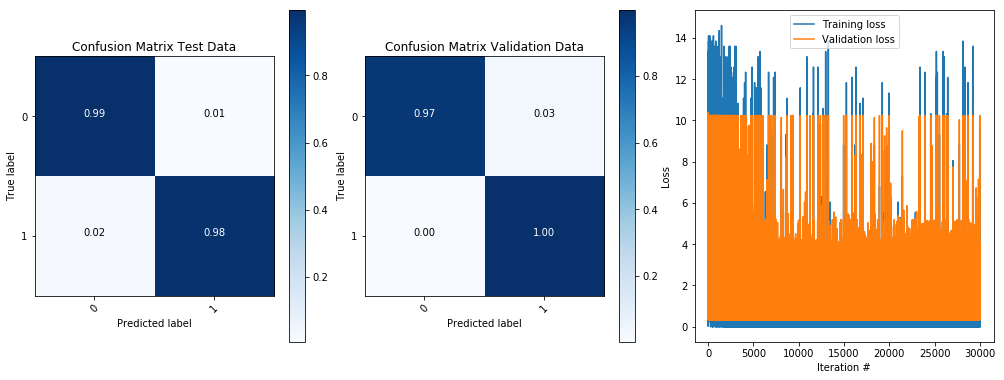

In [4]:
if __name__ == "__main__": 
    data_train = read_csv('data_training.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
    data_test1 = read_csv('data_test.txt', header=0, index_col=1, parse_dates=True, squeeze=True)
    data_validation = read_csv('data_validation.txt', header=0, index_col=1, parse_dates=True, squeeze=True)    
    
    N = data_train.values.shape[0]
    features = data_train.values[:,1:-1]
    labels = data_train.values[:,-1]
    
    # Training data 
    X_train = features.astype('float32')
    y_train = labels[:,None].astype('int8')
    
    # Test data
    features_test1 = data_test1.values[:,1:-1]
    labels_test1 = data_test1.values[:,-1]
    
    X_test1 = features_test1.astype('float32')
    y_test1 = labels_test1[:,None].astype('int8')

    # Validation data
    features_validation = data_validation.values[:,1:-1]
    labels_validation = data_validation.values[:,-1]
    
    X_val = features_validation.astype('float32')
    y_val = labels_validation[:,None].astype('int8')
    # Define model
    model = IRLS(X_train, y_train, X_val, y_val)
    
    # Train the model
    w = model.IRLS_train(30000, batch_size = 64)
    
    # Prediction
    test_labels = model.predict(X_test1, w)
    
    ACC1 = model.accuracy(y_test1, test_labels)
    print('Classification accuracy test set: %.3f%%' % (ACC1.mean(0)))
    plt.figure(1, figsize=(14,5))

    plt.subplot(1,3,1)
    plot_confusion_matrix(model.M, classes=np.arange(2), normalize=True, title="Confusion Matrix Test Data")

    test_labels = model.predict(X_val, w)
    
    ACC2 = model.accuracy(y_val, test_labels)
    print('Classification accuracy validation set: %.3f%%' % (ACC2.mean(0)))
    plt.subplot(1,3,2)
    plot_confusion_matrix(model.M, classes=np.arange(2), normalize=True,title="Confusion Matrix Validation Data")

    # Plotting
    plt.subplot(1,3,3)
    plt.plot(model.loss_log_t, label = 'Training loss')
    plt.plot(model.loss_log_v, label = 'Validation loss')
    
    plt.legend()
    plt.xlabel('Iteration #')
    plt.ylabel('Loss')
    plt.show()
